# **ASSIGNMENT 16** #

## ***FOREST FIRES*** ##

File : forestfires.csv

In [128]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.layers import Input, Dense, Dropout
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_regression

### **Importing data from file forestfires.csv** ###

In [2]:
# Reading the data from the file 'forestfires.csv'
ff_orig_data = pd.read_csv('forestfires.csv')
ff_orig_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### **EDA (Exploratory Data Analysis)** ###

In [3]:
ff_orig_data.shape

(517, 31)

In [4]:
ff_orig_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


#### *Descriptive Analysis* ####

In [5]:
ff_orig_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ff_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

#### *Checking for missing values* ####

In [7]:
# check for missing values
ff_orig_data.isna().sum() # The result shows that there are no missing values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

#### *Checking for Null Values* ####

In [8]:
# Checking to see if there are any null values
# We can get this information using ff_orig_data.info() option as well
ff_orig_data.isnull().sum() # The result shows that there are no null values

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
# Checking for Duplicate Values
ff_orig_data.duplicated()  # if any 2 rows has same values

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [10]:
# Count of duplicated rows
ff_orig_data[ff_orig_data.duplicated()].shape # We see that there are no duplicates

(8, 31)

In [11]:
# Print the duplicated rows. Since we have duplicates it will show us the record
ff_orig_data[ff_orig_data.duplicated()] # There are no duplicates

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


#### *Checking the data structure* ####

In [12]:
# Data Structure
print(type(ff_orig_data))
ff_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(517, 31)

In [13]:
# Checking data types
ff_orig_data.dtypes # check data types of all variables

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [14]:
ff_data = ff_orig_data.copy()

In [15]:
# Categorical features
# For columns in company_data.columns:
# If company_data[columns].dtypes == 'object' or company_data[columns].dtypes == 'category':
categorical_cols = []
for columns in ff_data:
        if ff_data[columns].dtypes == 'object':
                categorical_cols.append(columns)
categorical_cols

['month', 'day', 'size_category']

In [16]:
# Numerical features
import re

day_regex = "^day."
month_regex = "^month."

numerical_cols = []
for columns in ff_data:
    if ((ff_data[columns].dtypes != "object") and (not re.match(day_regex, columns)) and (not re.match(month_regex, columns))):
        numerical_cols.append(columns)

numerical_cols


['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [17]:
numeric_data = ff_data[numerical_cols]
numeric_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [18]:
categoric_data = ff_data[categorical_cols]
categoric_data

,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small
...,...,...,...
512,aug,sun,large
513,aug,sun,large
514,aug,sun,large
515,aug,sat,small


#### **Visualizations** ####

#### ***Numerical Features*** ####

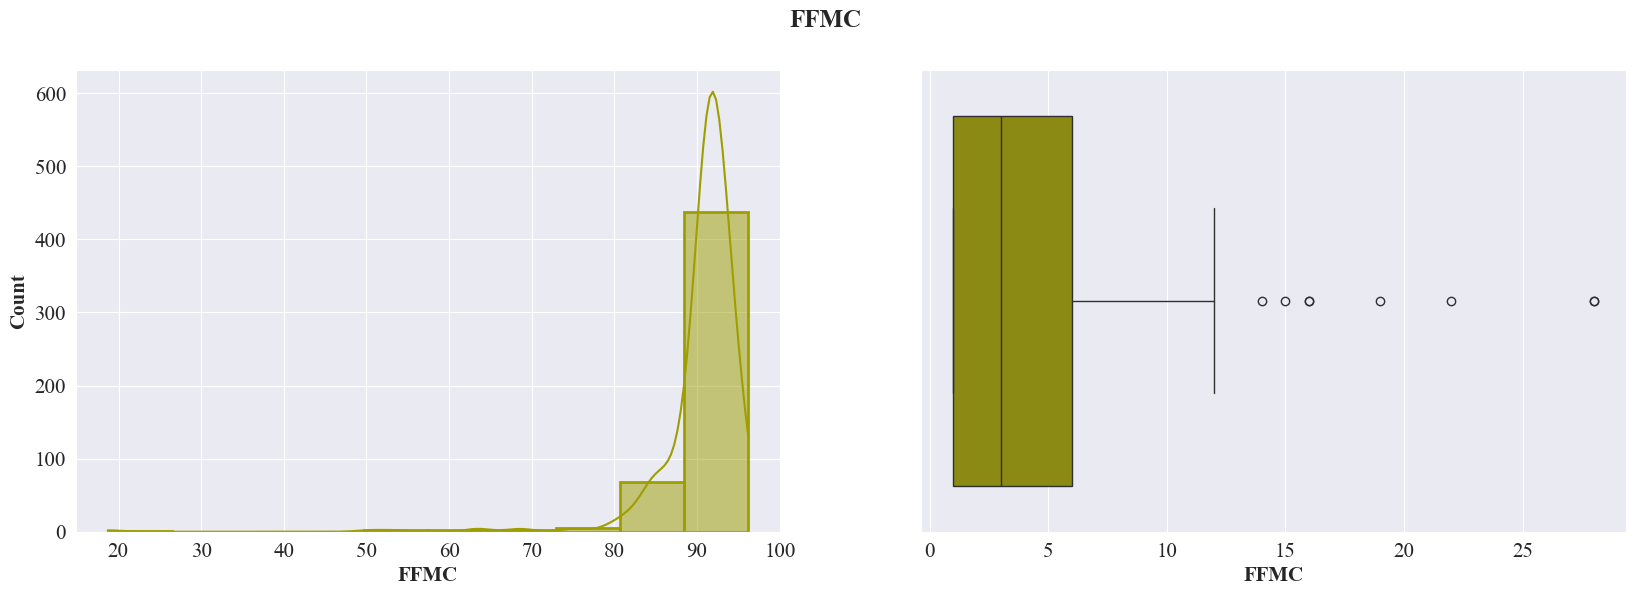

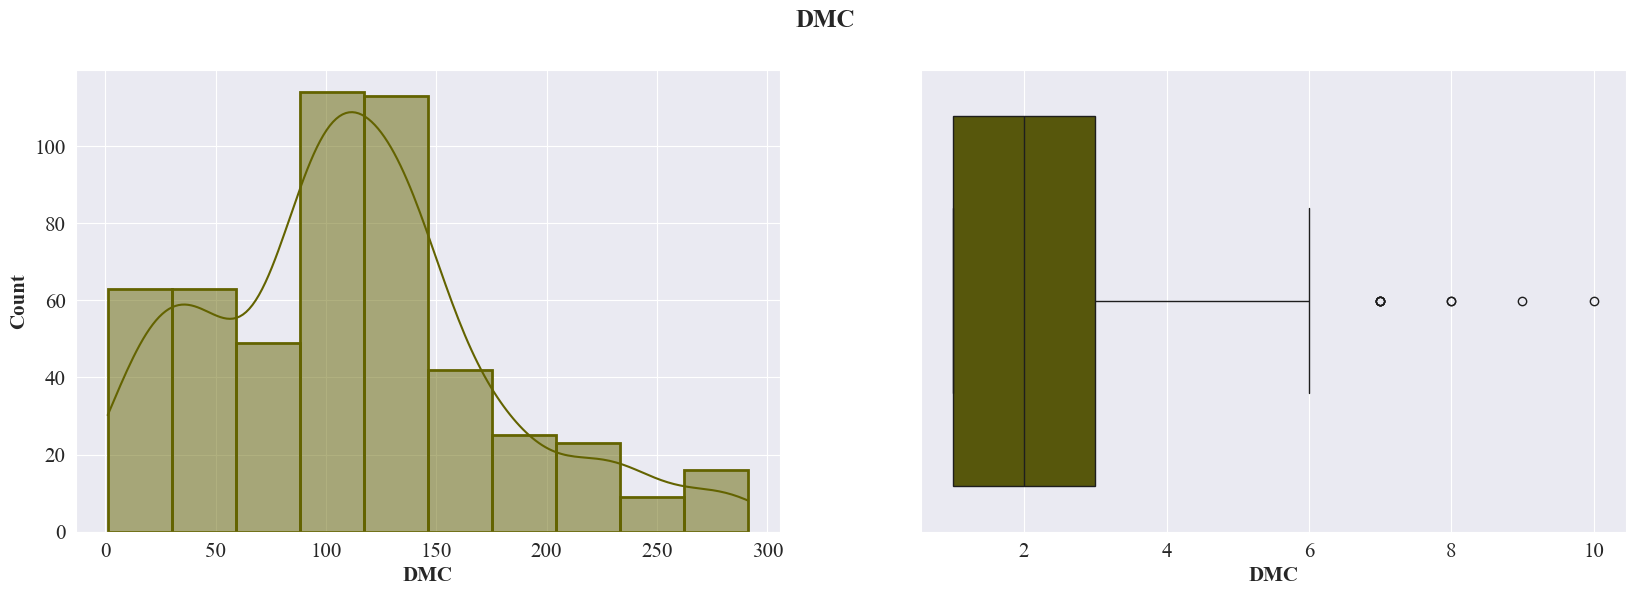

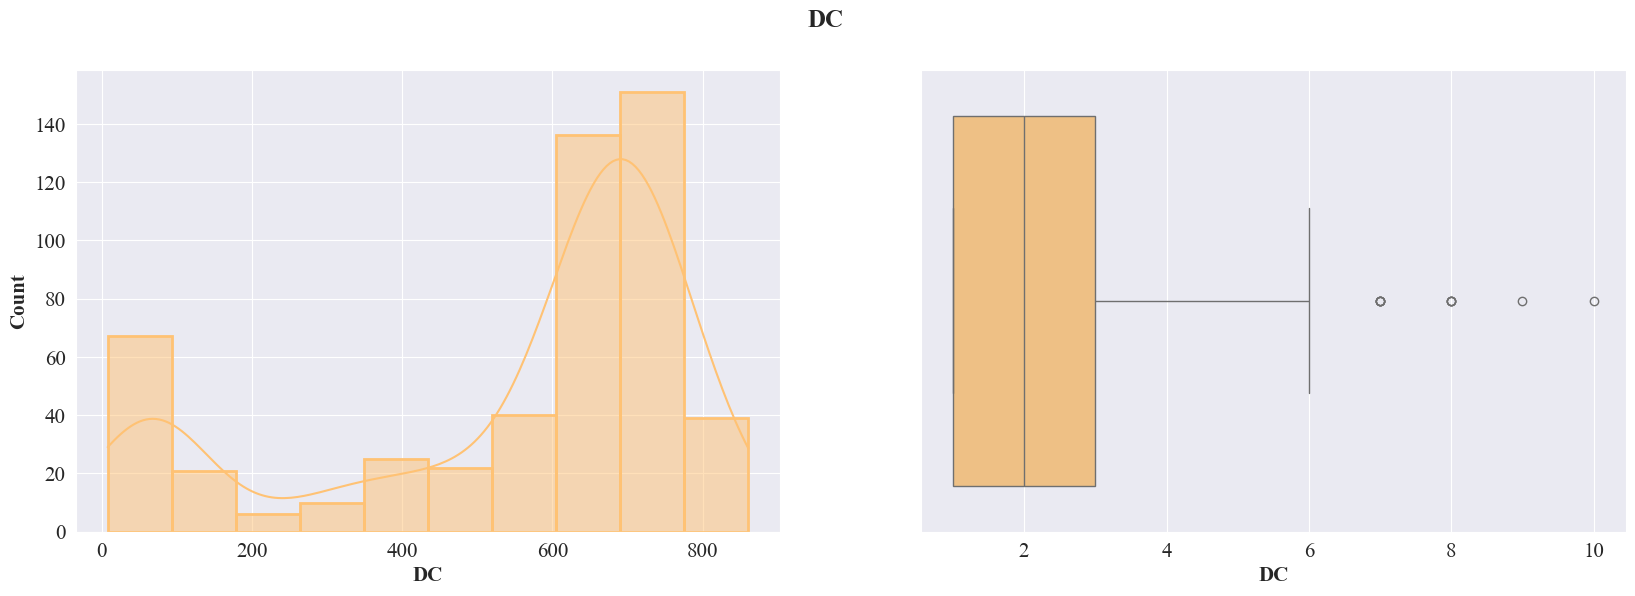

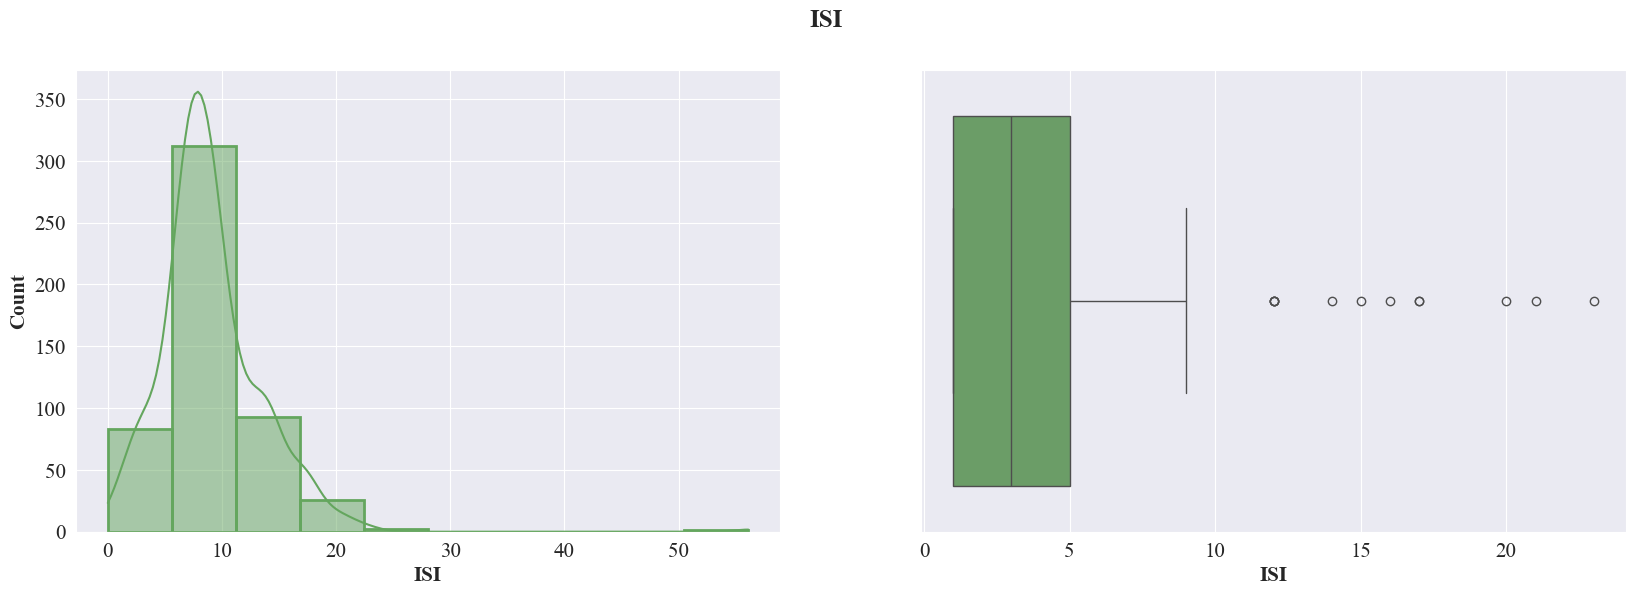

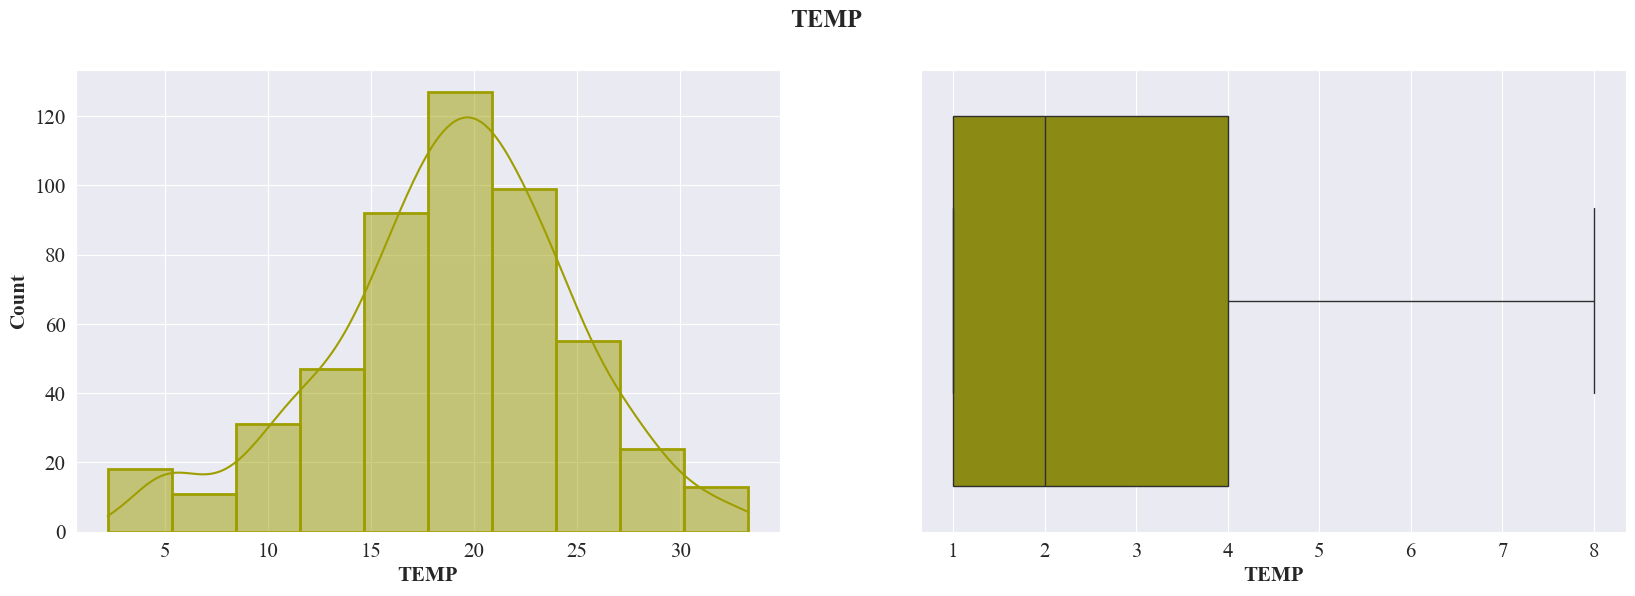

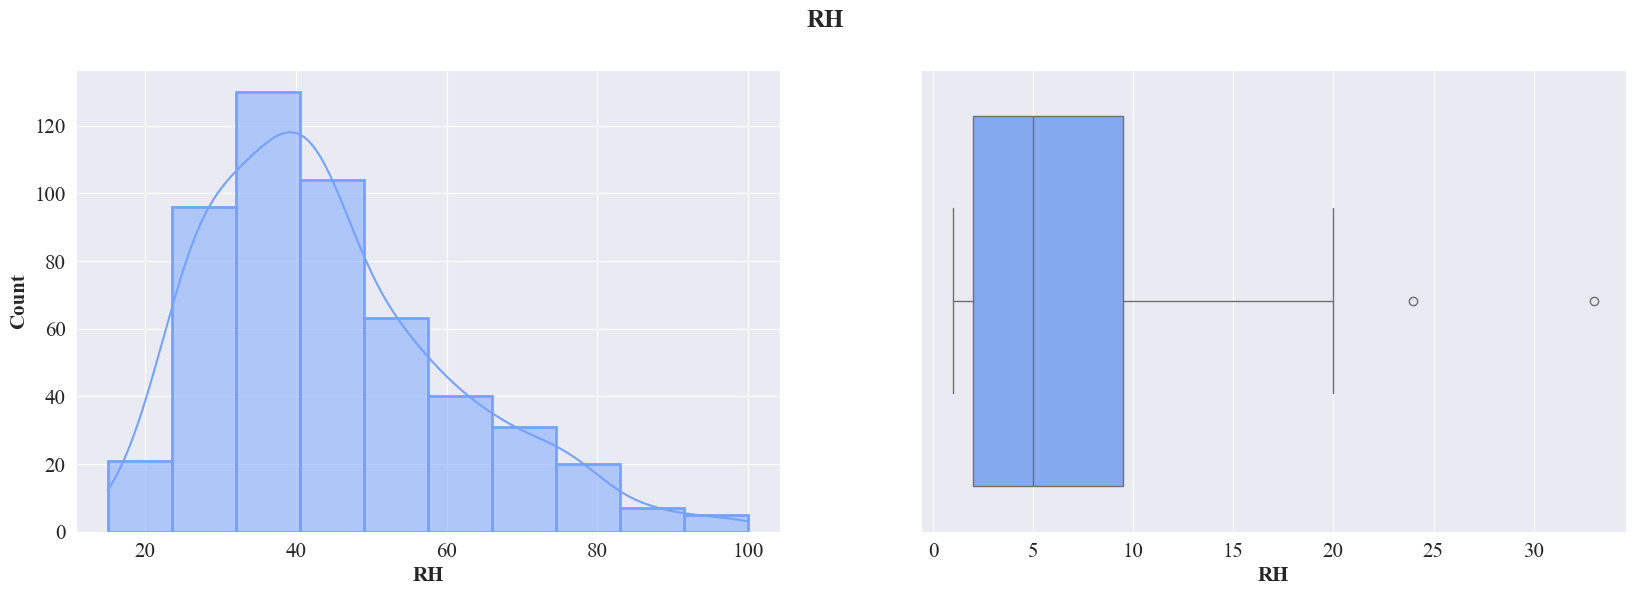

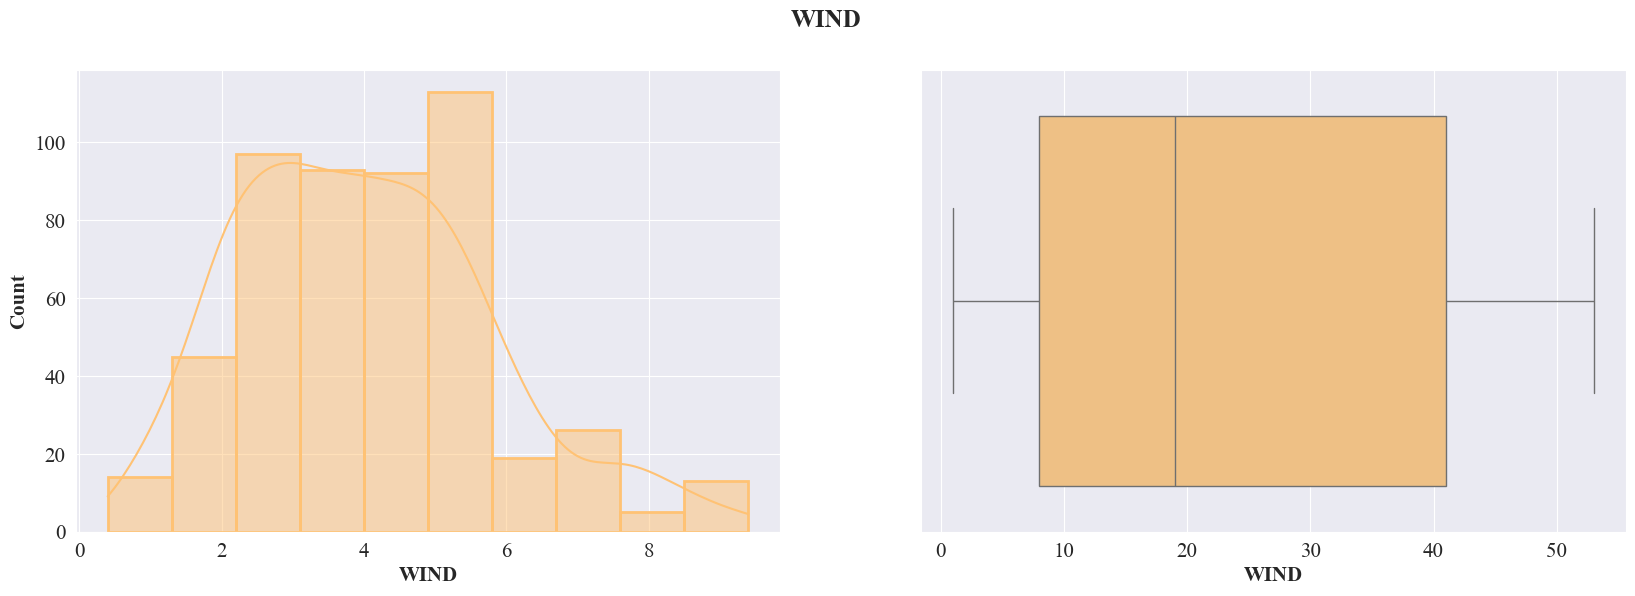

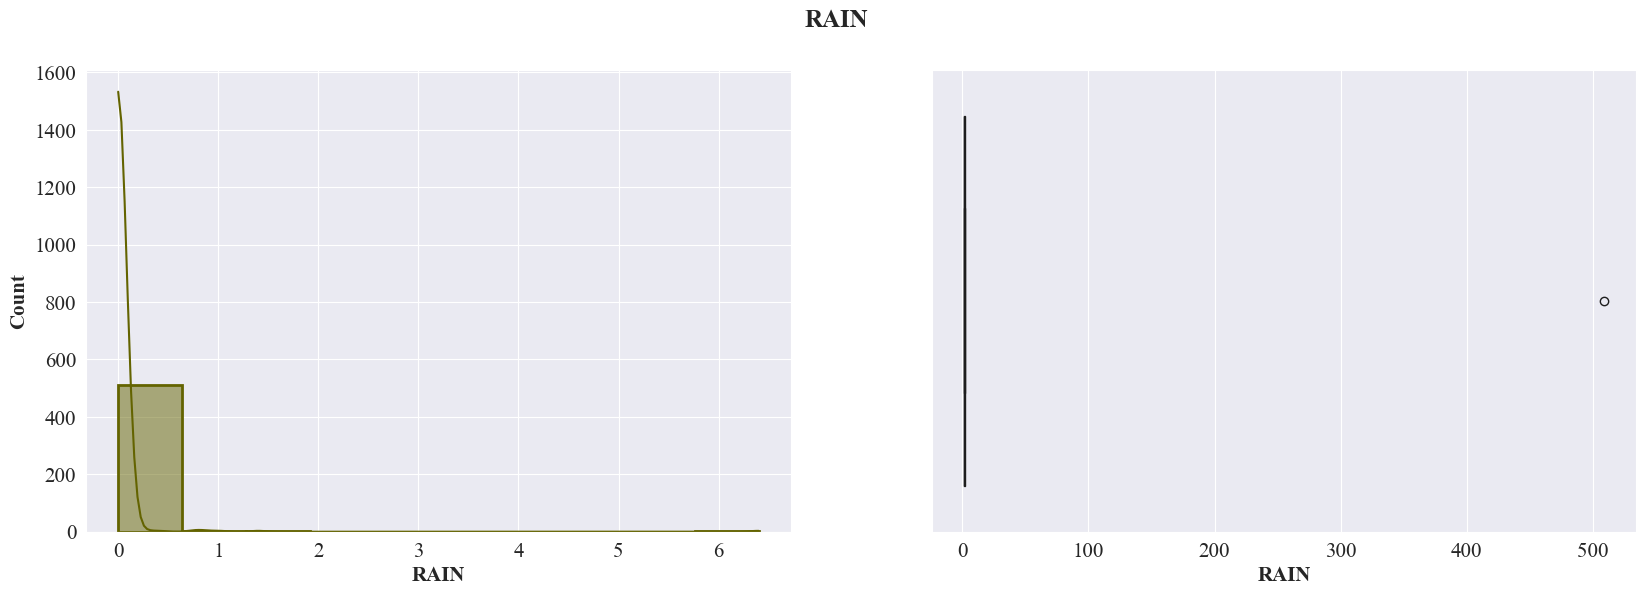

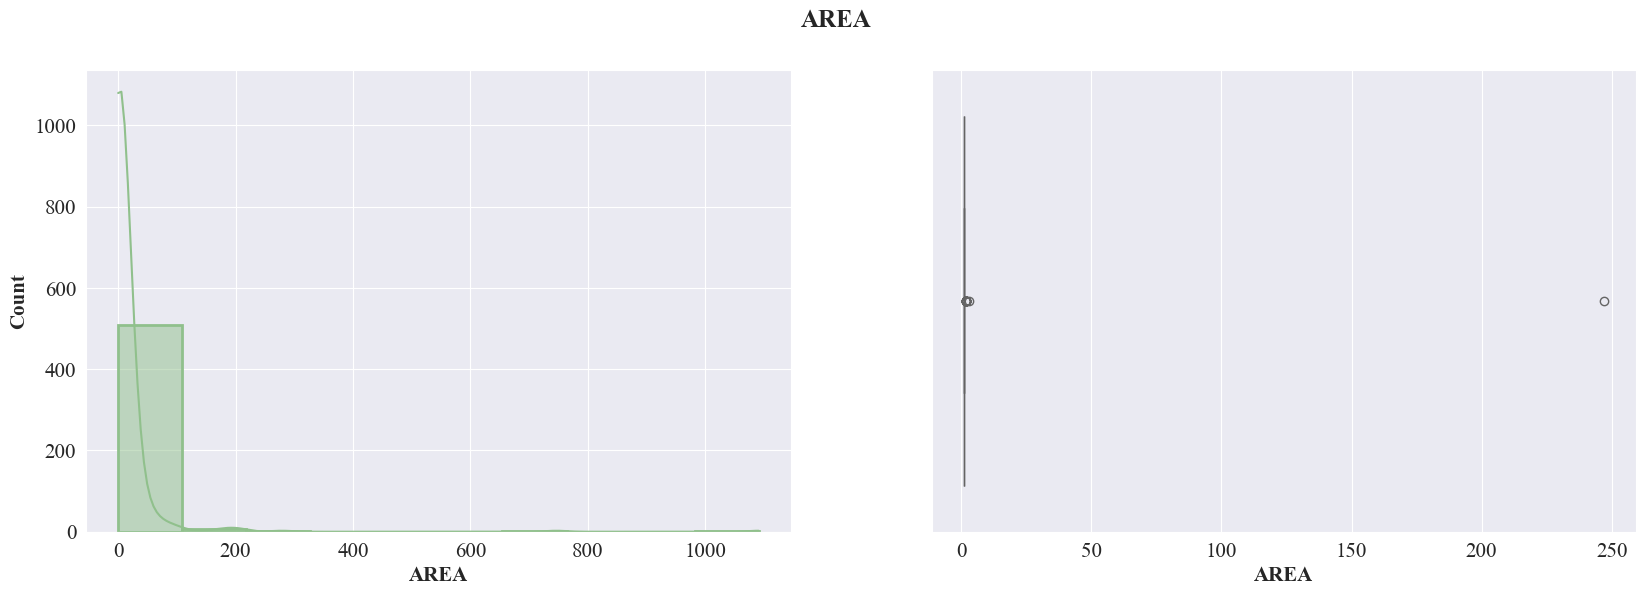

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in ff_data[numerical_cols]:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(ff_data,cols)

#### ***Categorical Features*** ####

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


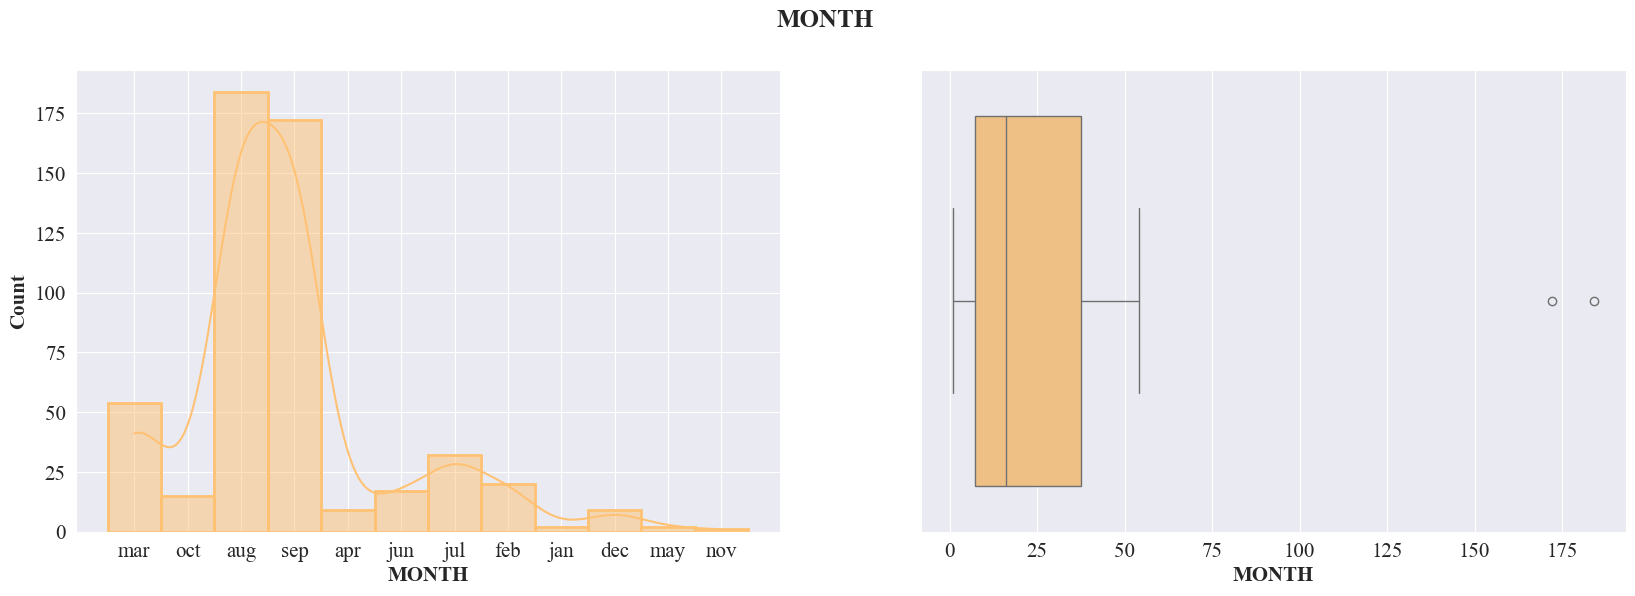

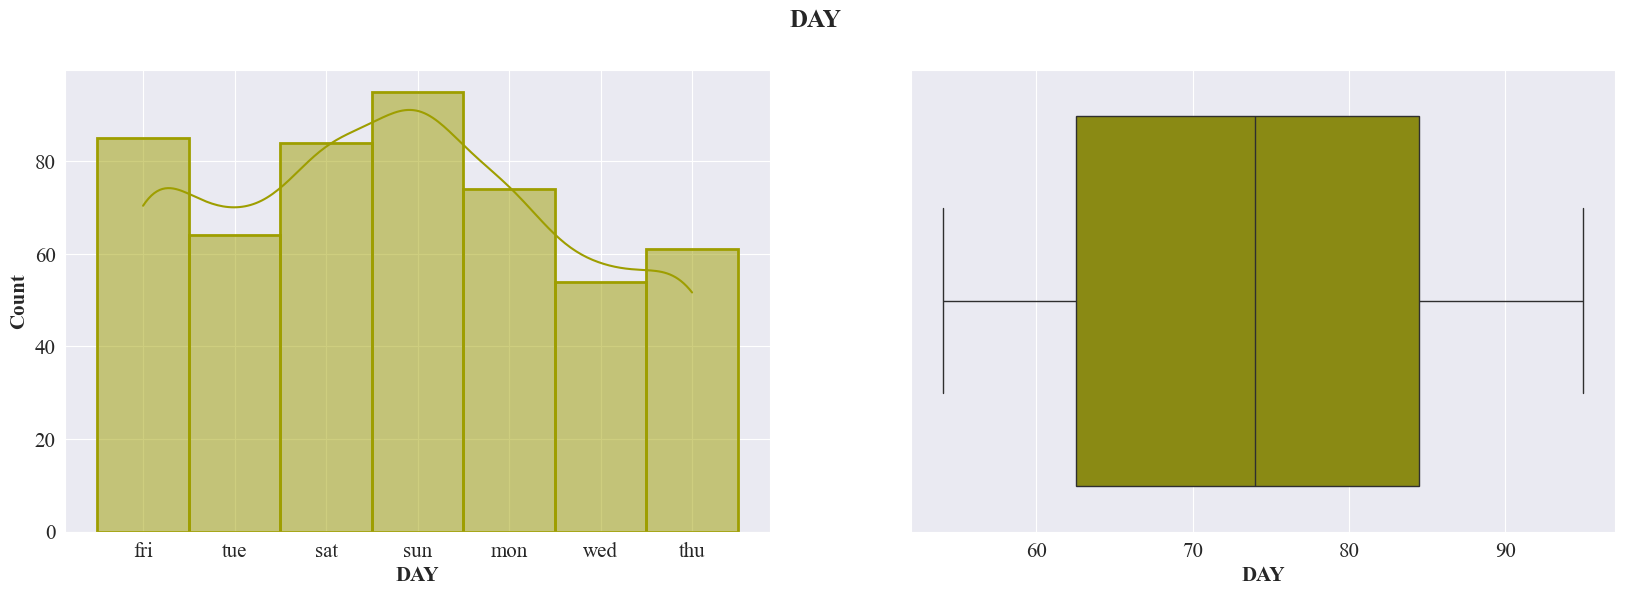

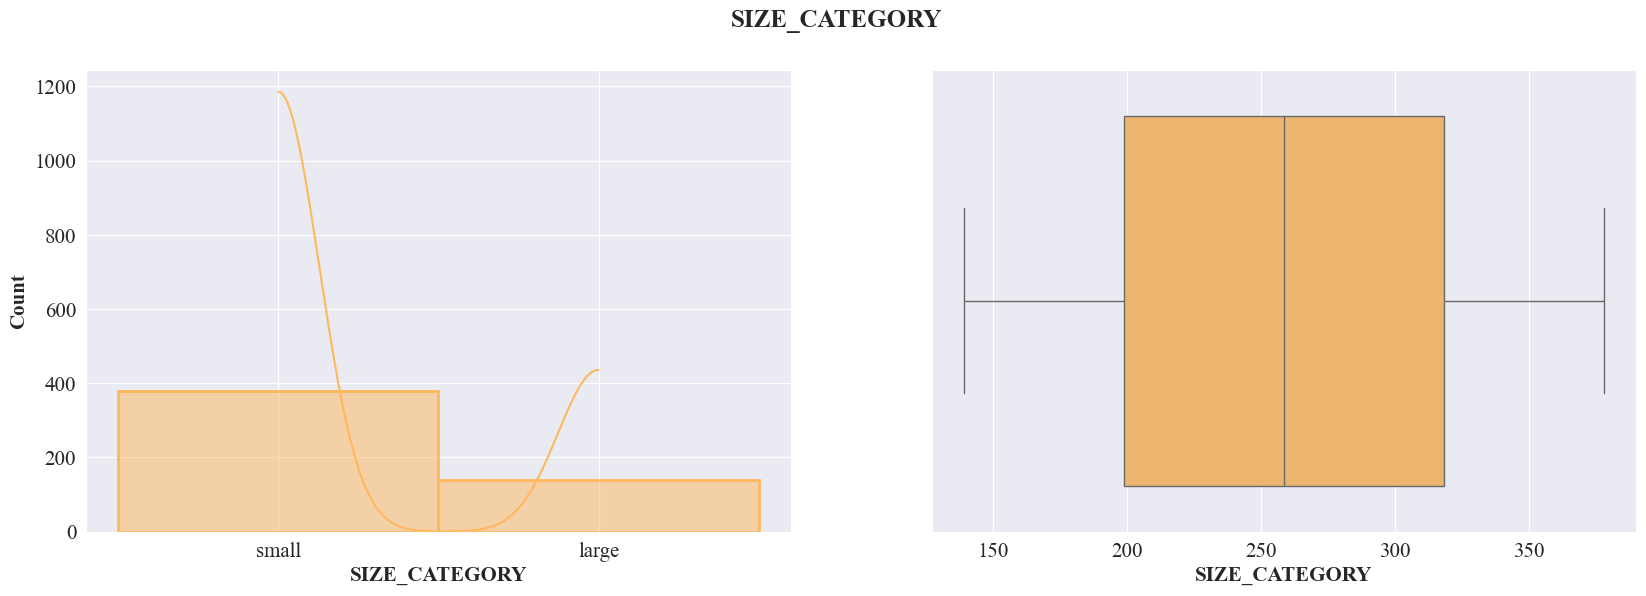

In [20]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in ff_data[categorical_cols]:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(ff_data,cols)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


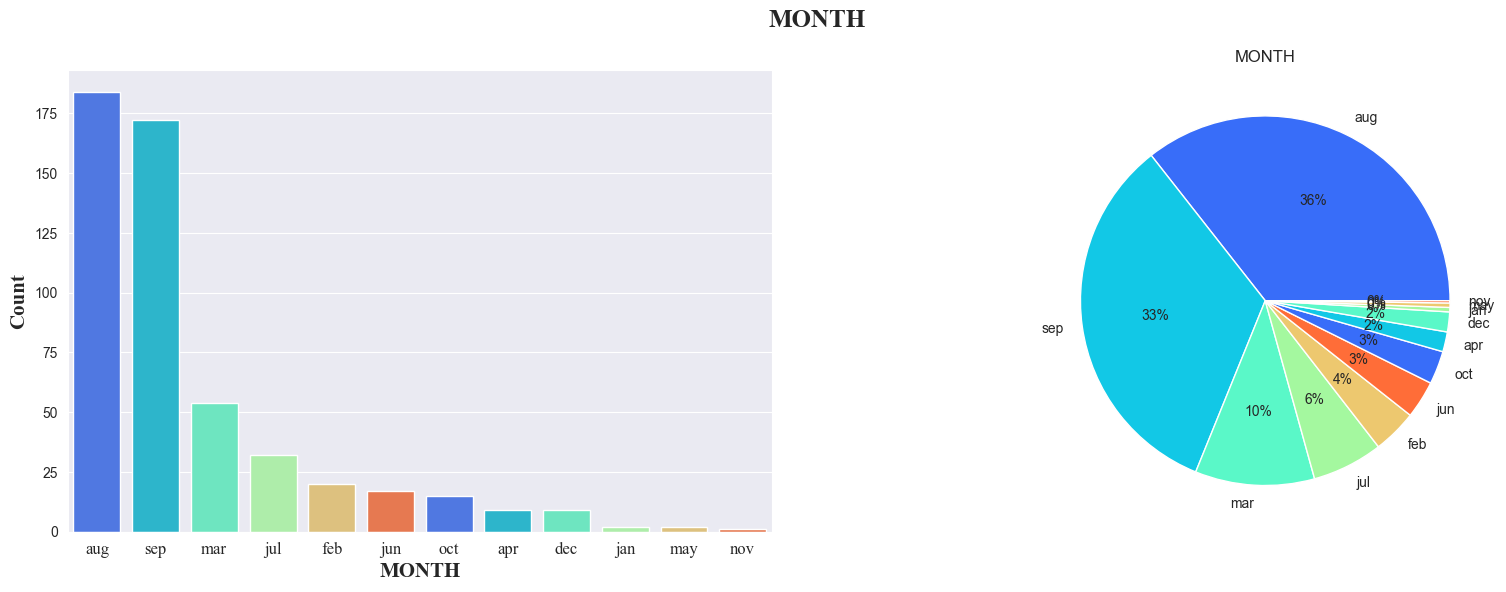

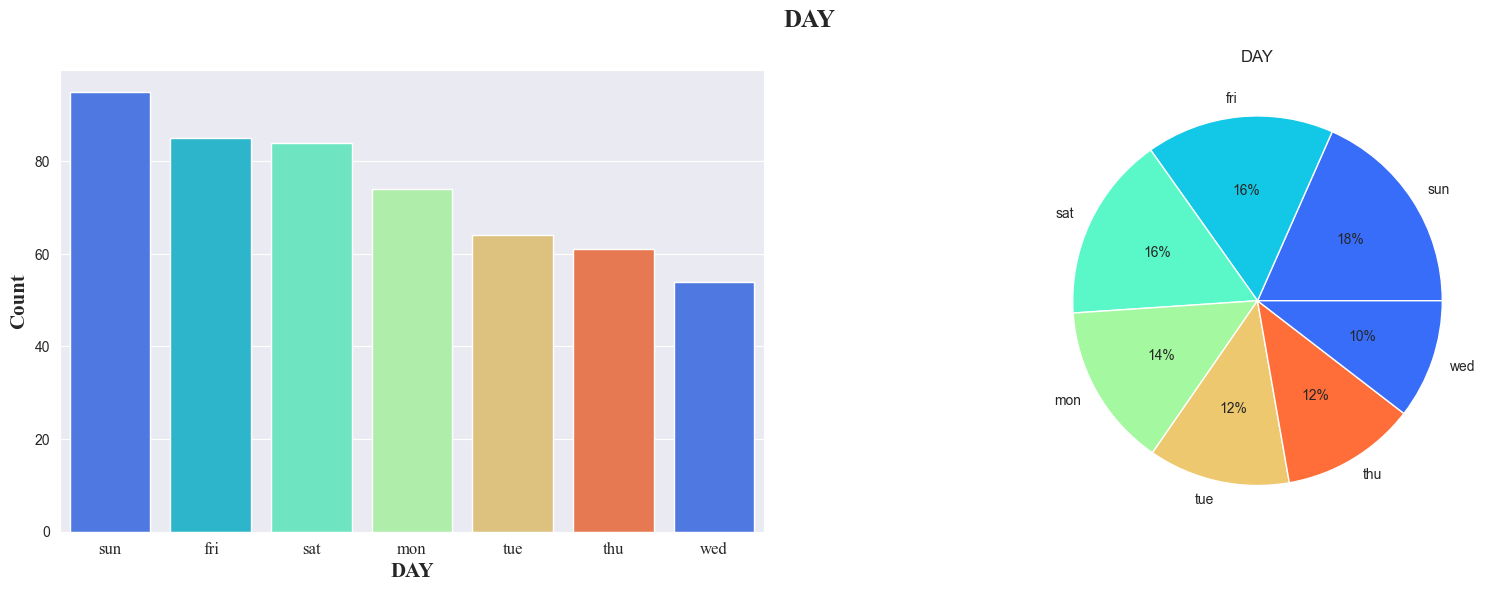

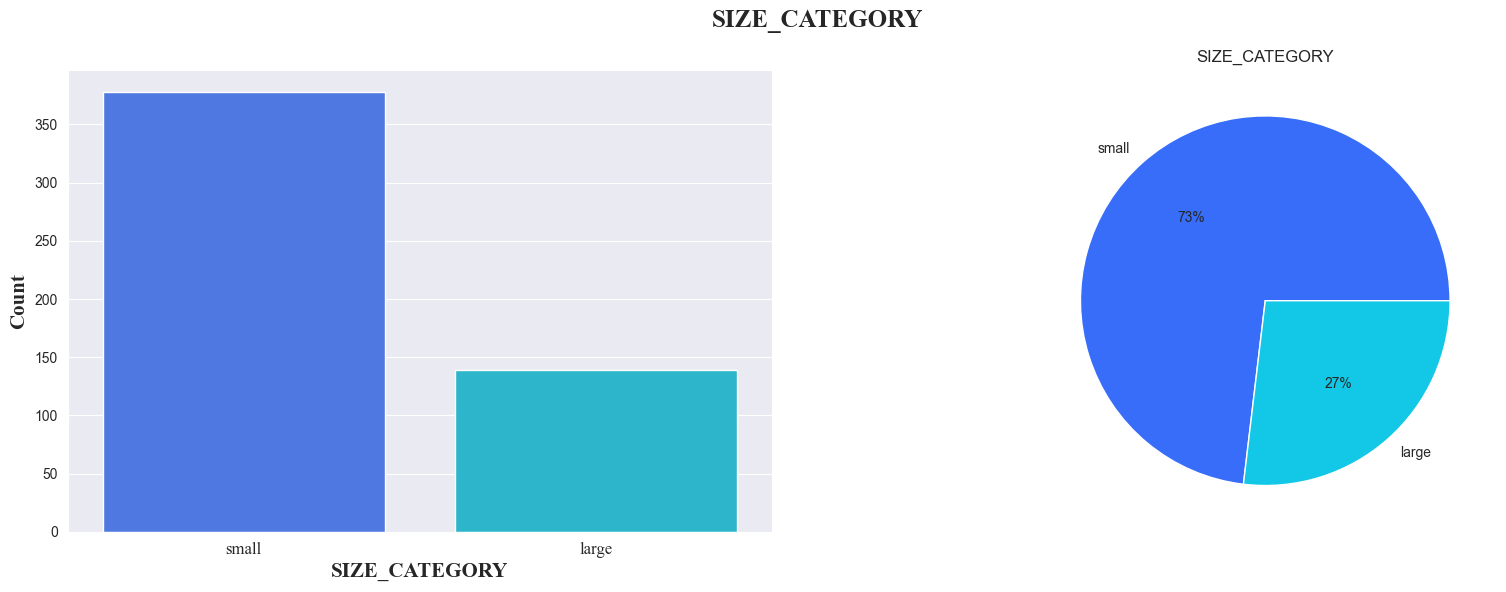

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature,color):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    palette_color = sns.color_palette(color)
    sns.countplot(x=feature, data=data, palette = palette_color, order=data[feature].value_counts().index)
    plt.xticks(rotation = 0,fontsize = 12, fontfamily = "Times New Roman")
    plt.xlabel(feature.upper(), weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

  
    # Display state data in a form of Pie Graph
    plt.subplot(1,2,2)
    values = data[feature].value_counts().keys().tolist()
    counts = data[feature].value_counts().tolist()
    plt.pie(data[feature].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
    plt.suptitle(feature.upper(), weight='bold', fontfamily = "Times New Roman").set_fontsize('18')

for c_cols in ff_data[categorical_cols]:
    colors = ['bright','rainbow']
    color = random.choice(colors)
    plot_data(ff_data[categorical_cols],c_cols,color)
    plt.title(c_cols.upper())

In [22]:
# Showing features with more than one outlier

def get_outliers(data):
    
    outlier_indices = []
    for cols in data.columns.tolist():
        Q1 = np.percentile(data[cols], 25)  # 1st quartile (25%)
        Q3 = np.percentile(data[cols],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)
        outlier_step = 1.5 * IQR            # outlier step
        
        # Getting the list of indices of features having outliers
        outlier_list_col = data[(data[cols] < Q1 - outlier_step) | (data[cols] > Q3 + outlier_step )].index
        
        # Adding the outlier indices for features to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print(f'The dataset contains {len(get_outliers(ff_data[numerical_cols]))} observations with more than 2 outliers') 

The dataset contains 6 observations with more than 2 outliers


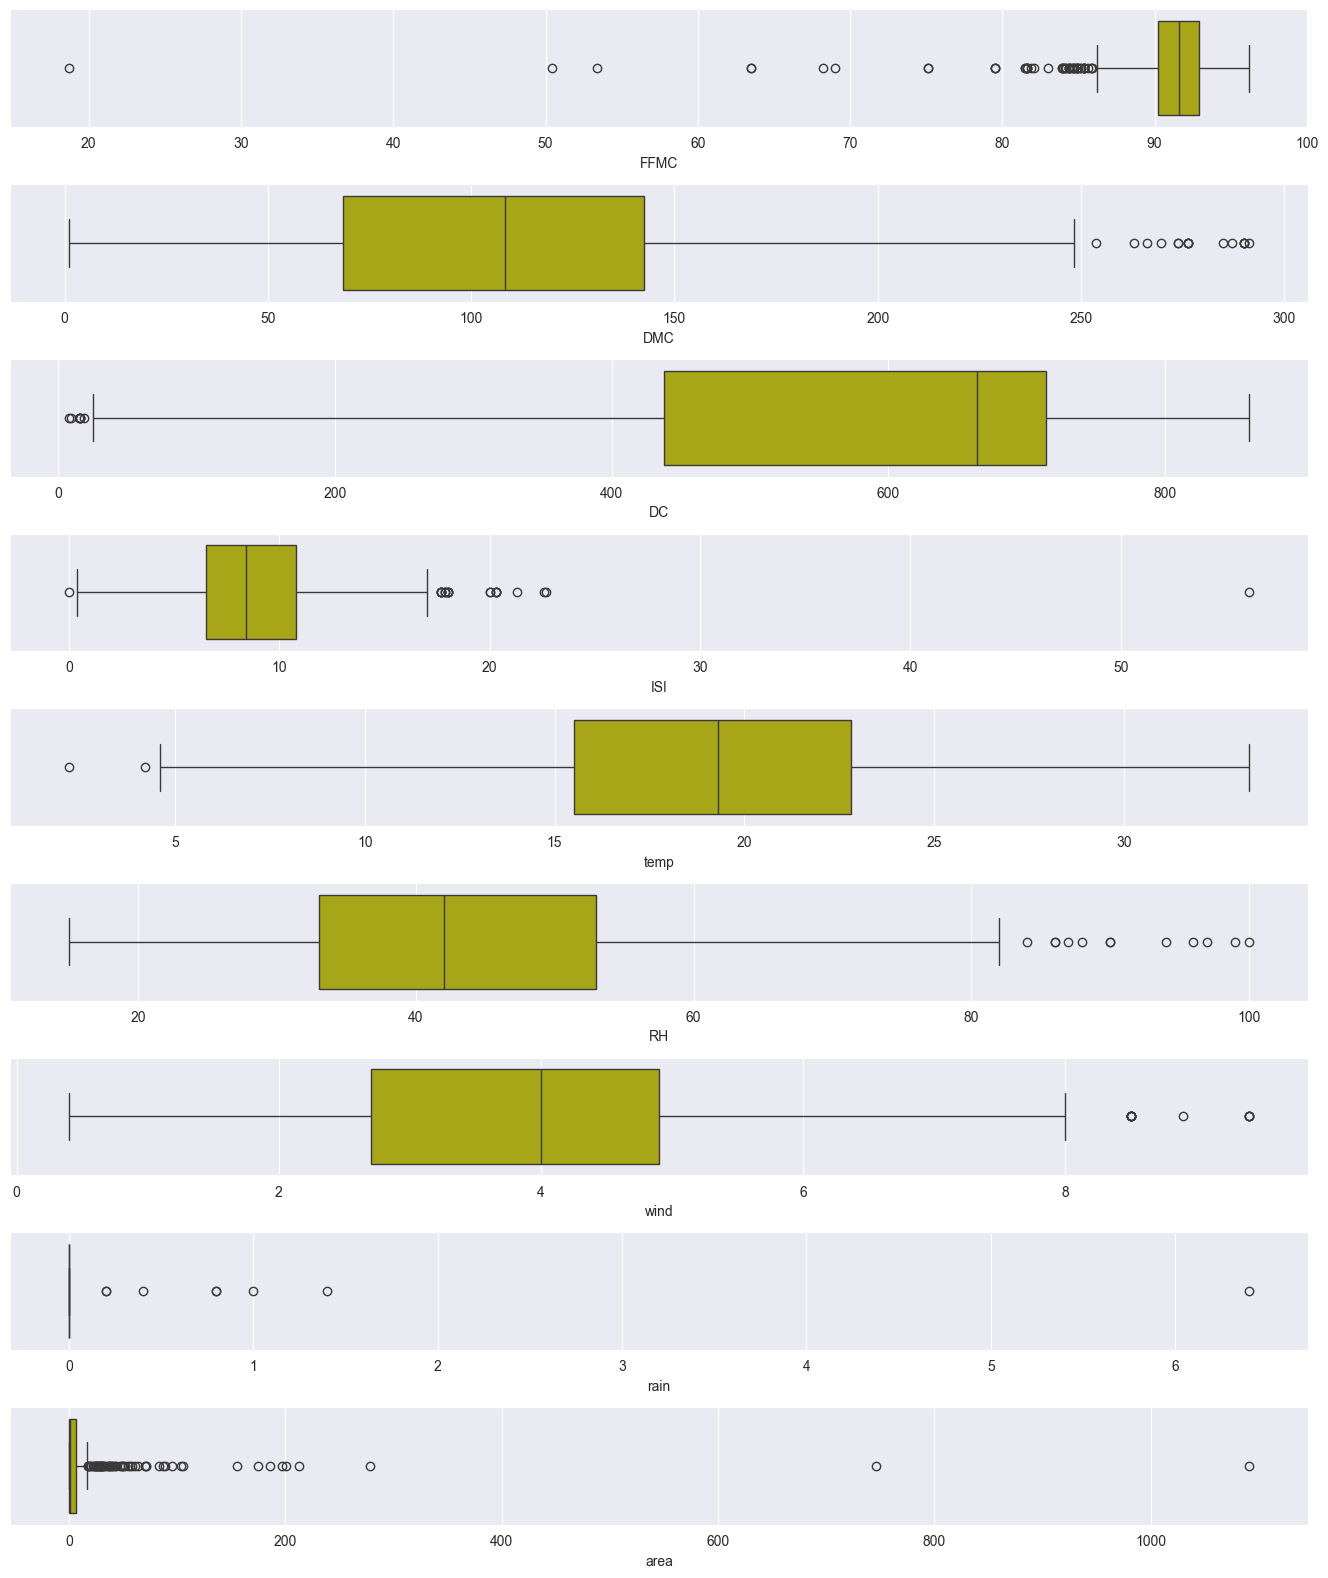

In [23]:
fig, axes=plt.subplots(9,1,figsize=(14,16),sharex=False,sharey=False)
plt.tight_layout(pad=2.0)
ax_cnt = 0
for cols in (ff_data[numerical_cols]):
    sns.boxplot(x=cols,data=ff_data,color='#bebe00',ax=axes[ax_cnt])
    ax_cnt +=1

##### **INFERENCE** #####
There are lot of outliers present in the dataframe but we should be dropping them because the numbers are large and may significantly affect the creation of the model

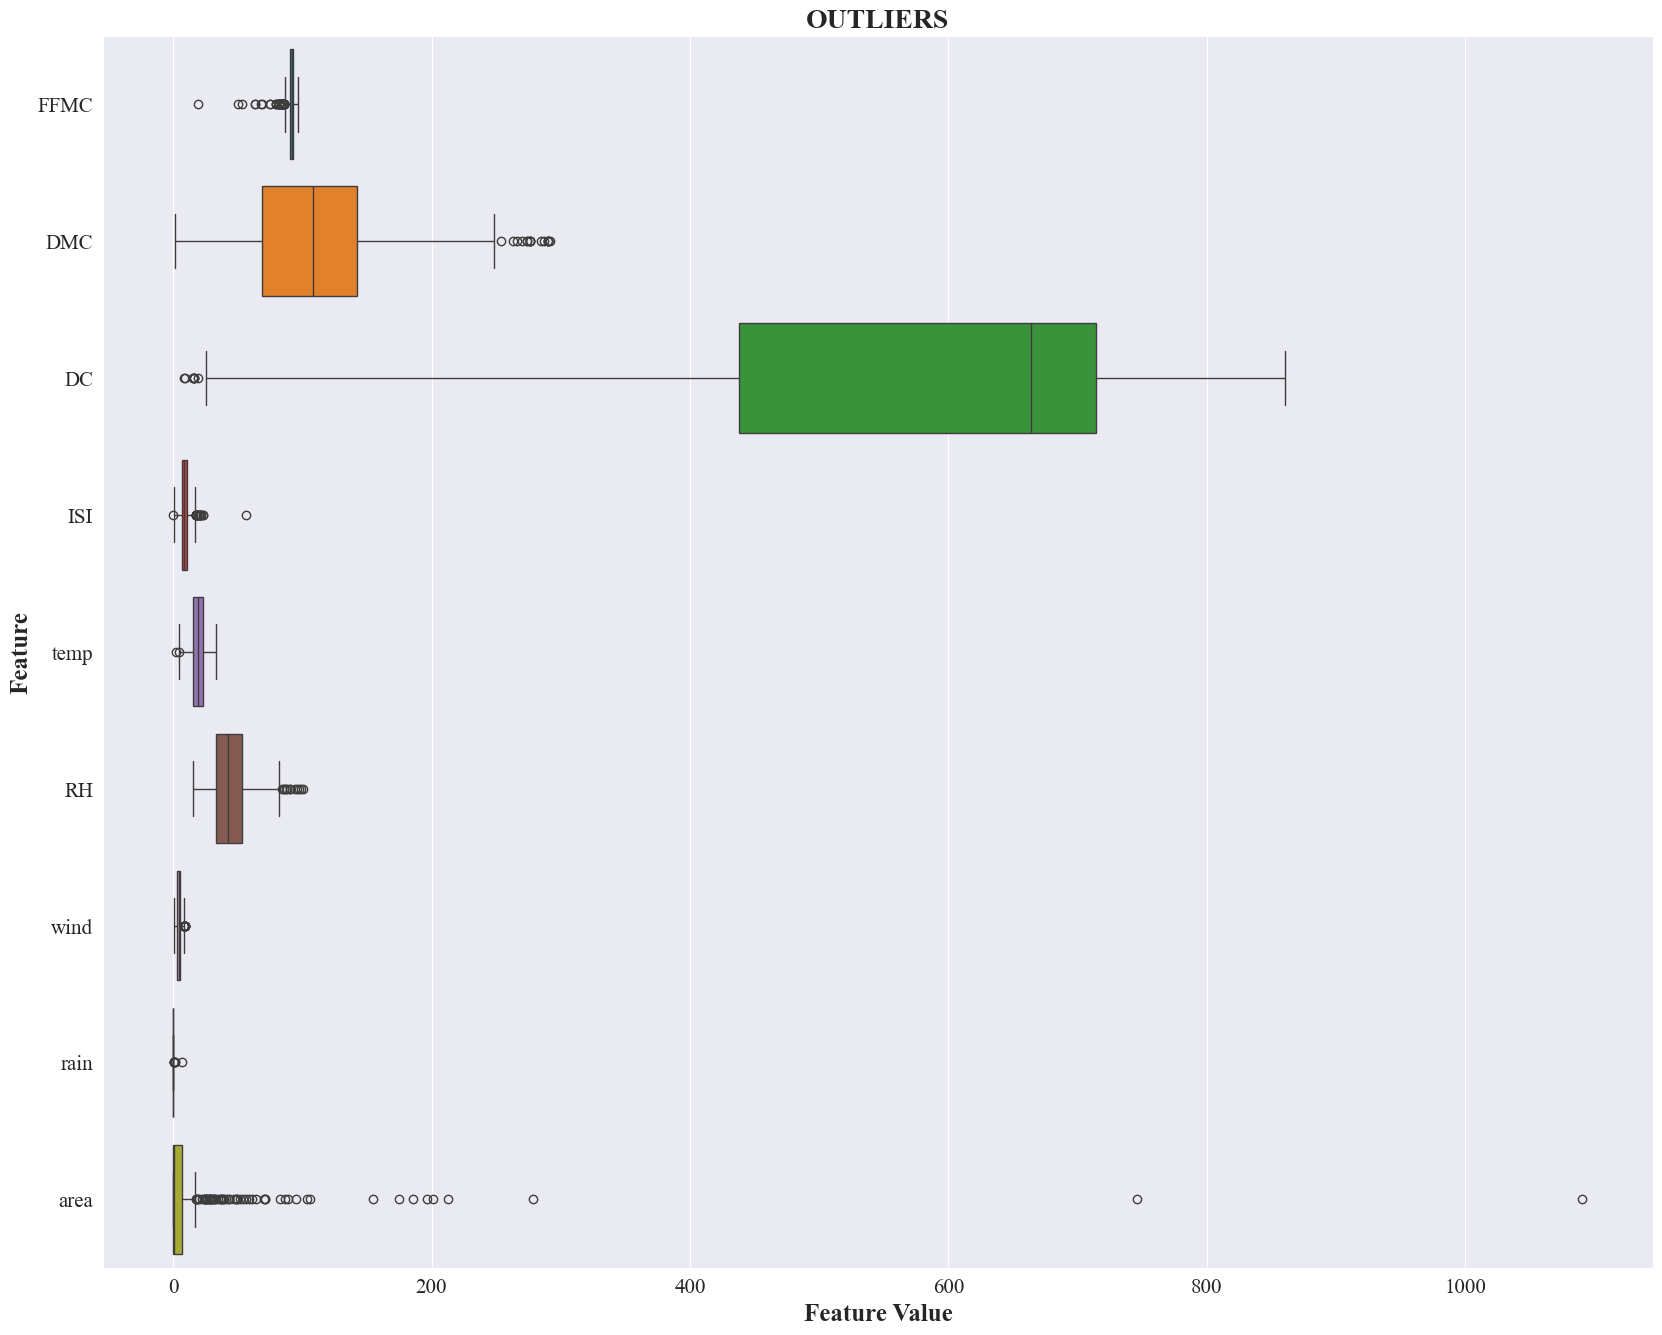

In [24]:

# Outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=ff_data[numerical_cols], orient="h")
plt.xlabel('Feature Value', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.ylabel('Feature', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.title('OUTLIERS', weight='bold', fontfamily = "Times New Roman", size = '20')
plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


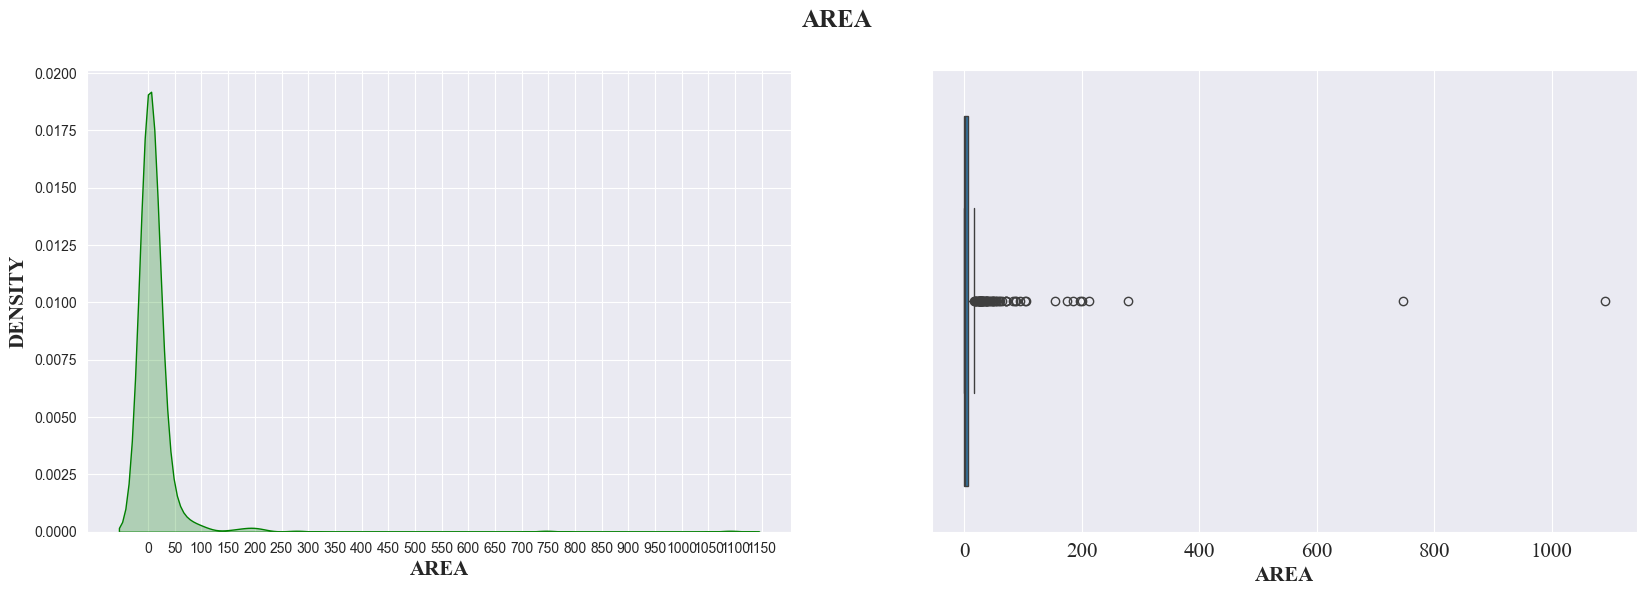

In [25]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
print("Skew: {}".format(ff_data['area'].skew()))
print("Kurtosis: {}".format(ff_data['area'].kurtosis()))
ax = sns.kdeplot(ff_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.ylabel('DENSITY', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.xlabel('AREA', weight='bold', fontfamily = "Times New Roman", size = '15')


#Display state data in a form of Pie Graph
plt.subplot(1,2,2)
sns.boxplot(data=ff_data['area'], orient="h")
plt.xlabel('AREA', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.suptitle('AREA', weight='bold', fontfamily = "Times New Roman", size = '18')

plt.show()

##### **INFERENCE** #####
- The data associated with 'area' is highly skewed with a value of +12.84 and huge kurtosis value of 194.
- The majority of forest fires are of less areas.

### **CORRELATION MATRIX** ###

In [26]:
ff_data[numerical_cols].corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


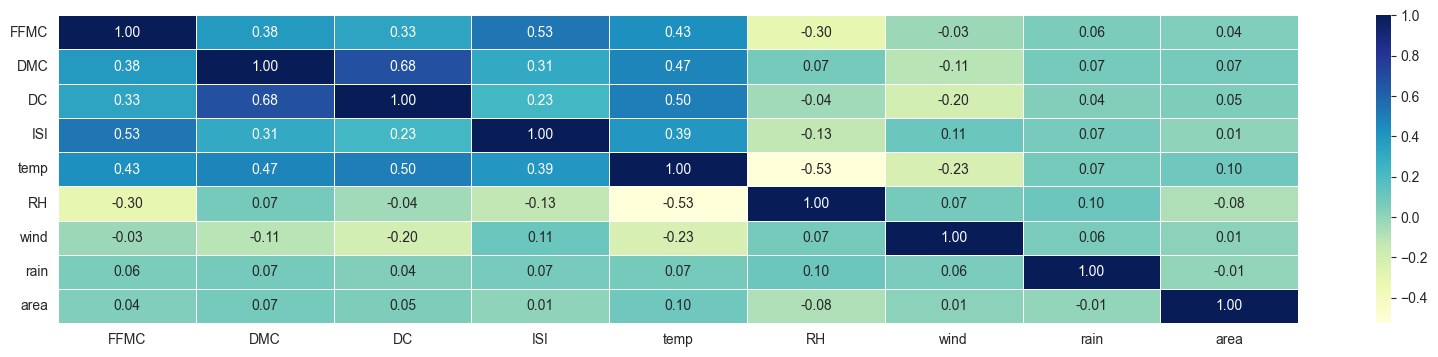

In [27]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(ff_data[numerical_cols].corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

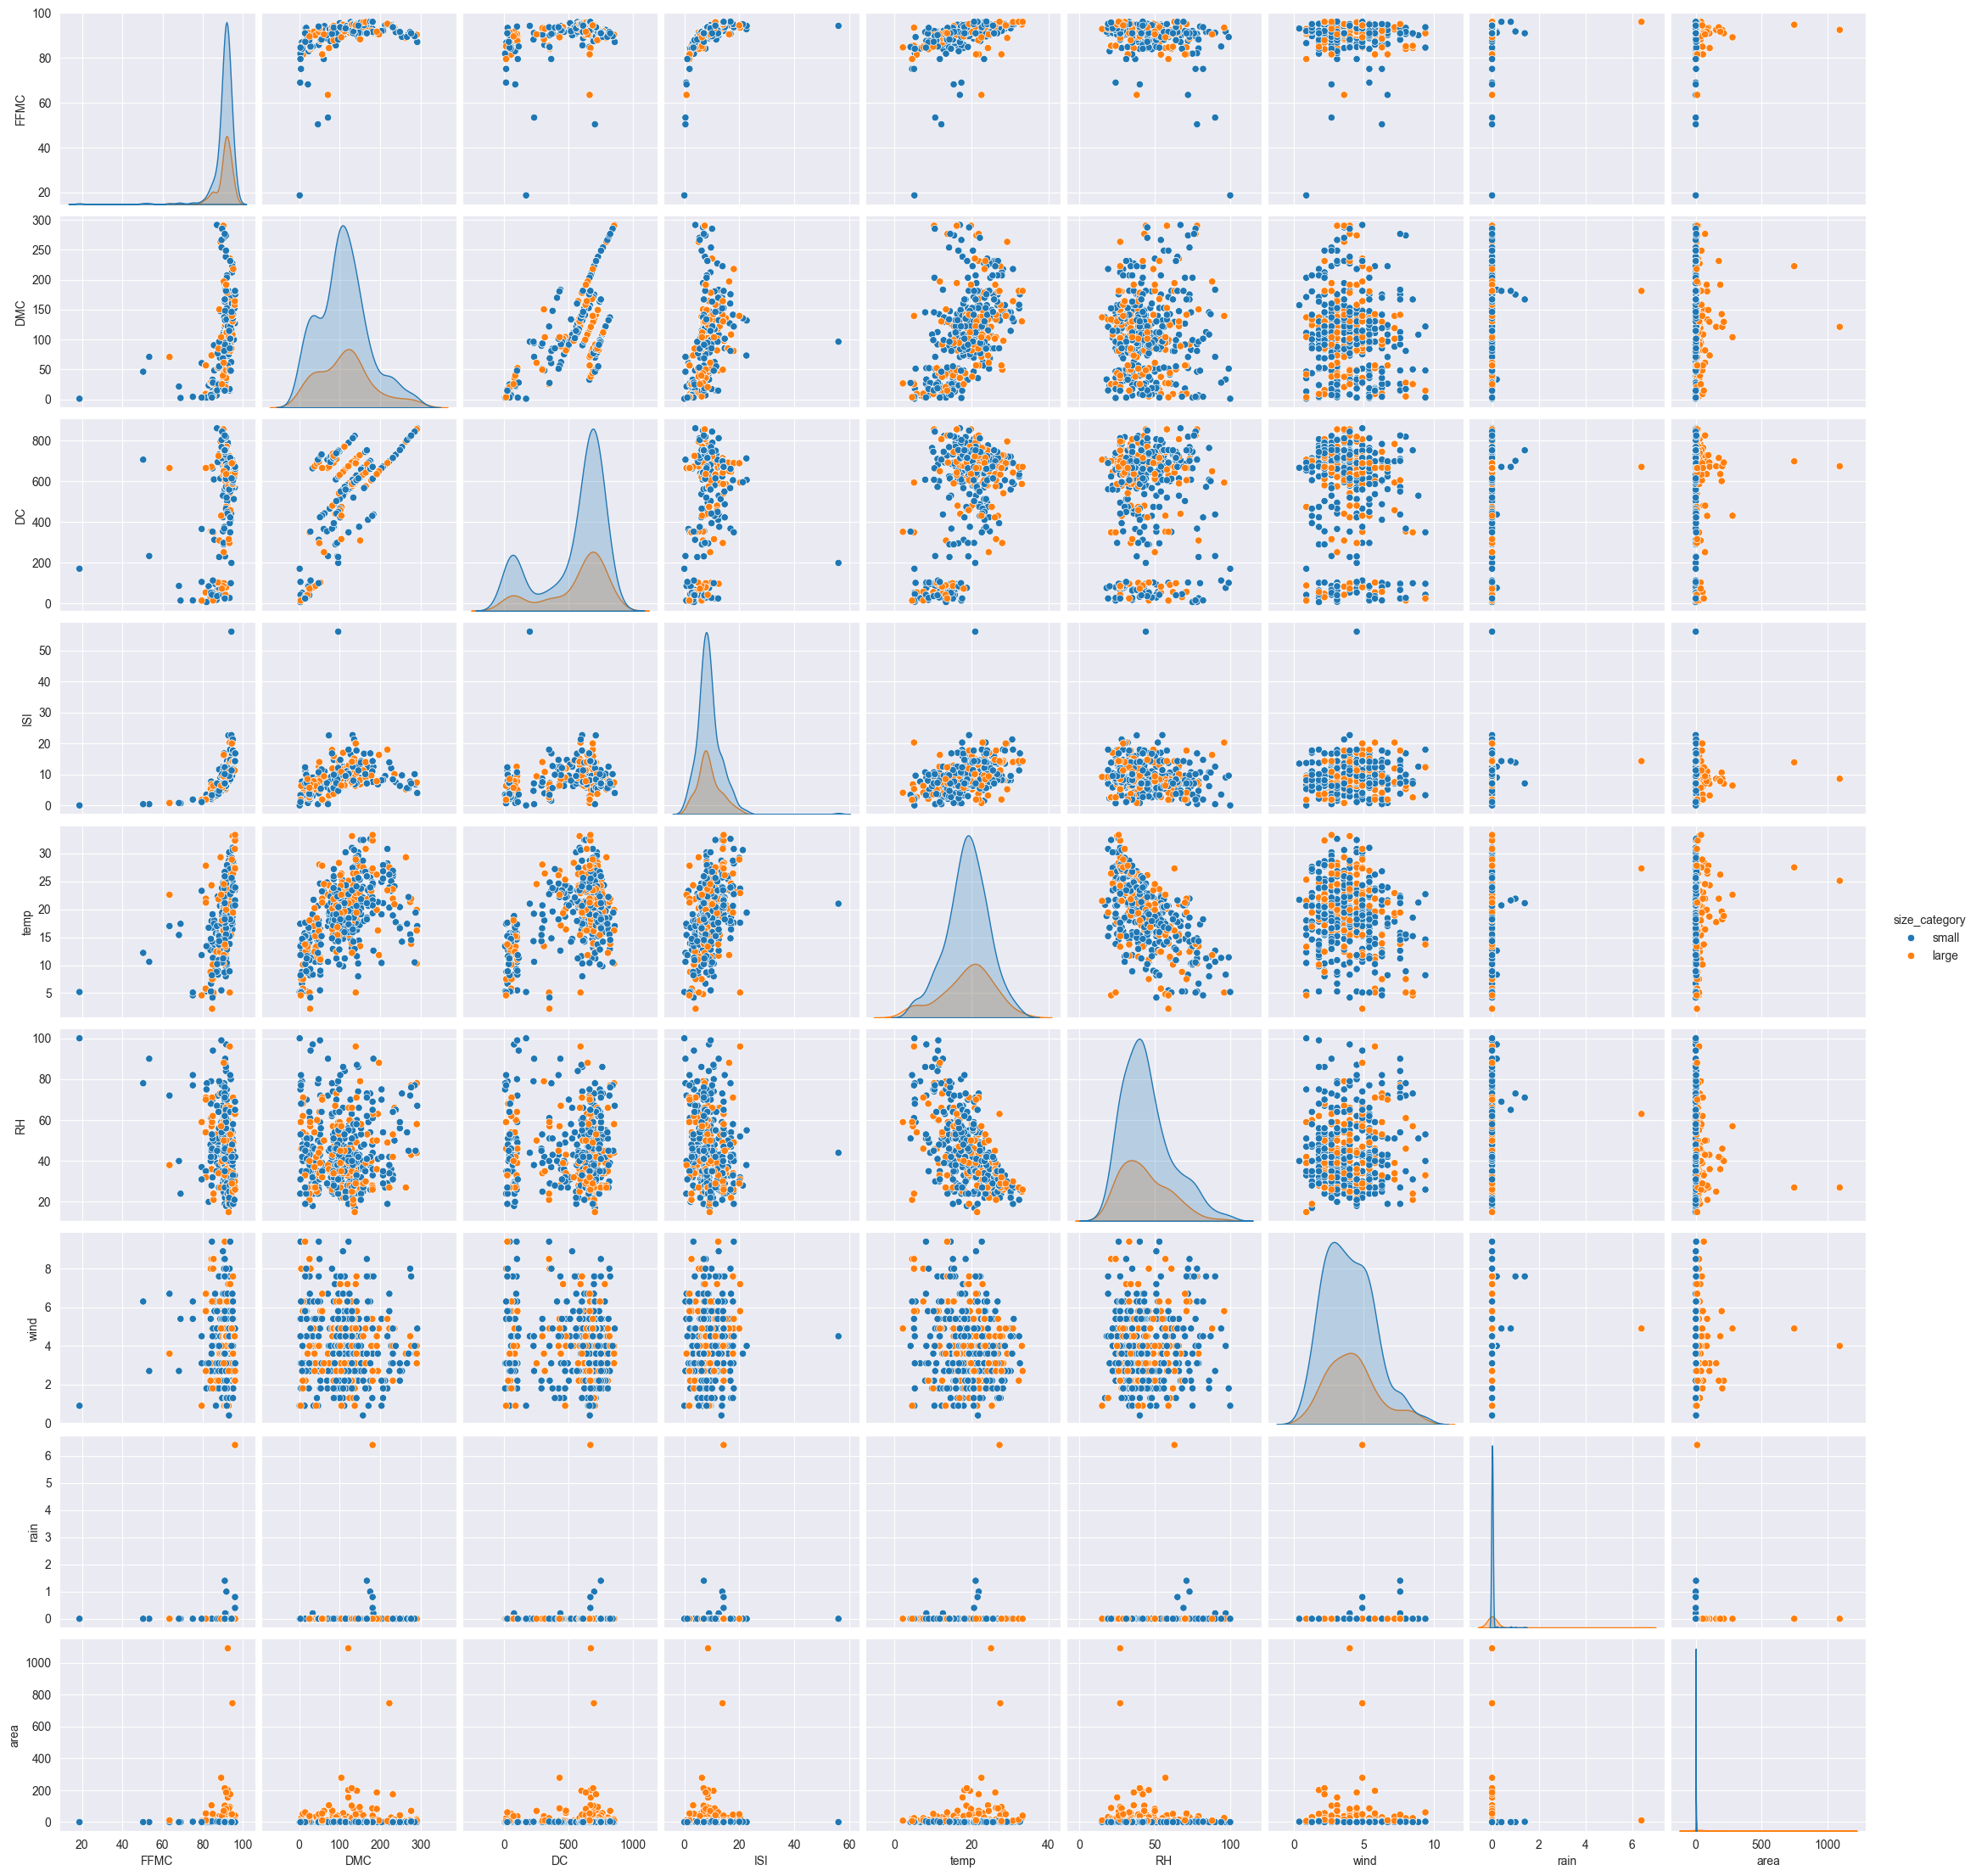

In [28]:
# Format the plot background and scatter plots for all the variables
corr_data = numeric_data
corr_data['size_category'] = ff_data['size_category']
import seaborn as sns
sns.set_style('darkgrid')
sns.pairplot(corr_data, hue='size_category')

In [29]:
ff_data = ff_orig_data.copy()

In [30]:
le = LabelEncoder()
le.fit(ff_data["size_category"])
ff_data["size_category"]=le.transform(ff_data["size_category"])

In [31]:
ff_data_corr = ff_data.drop(['month','day','area'], axis=1)

### ***CHECKING CORRELATION*** ###

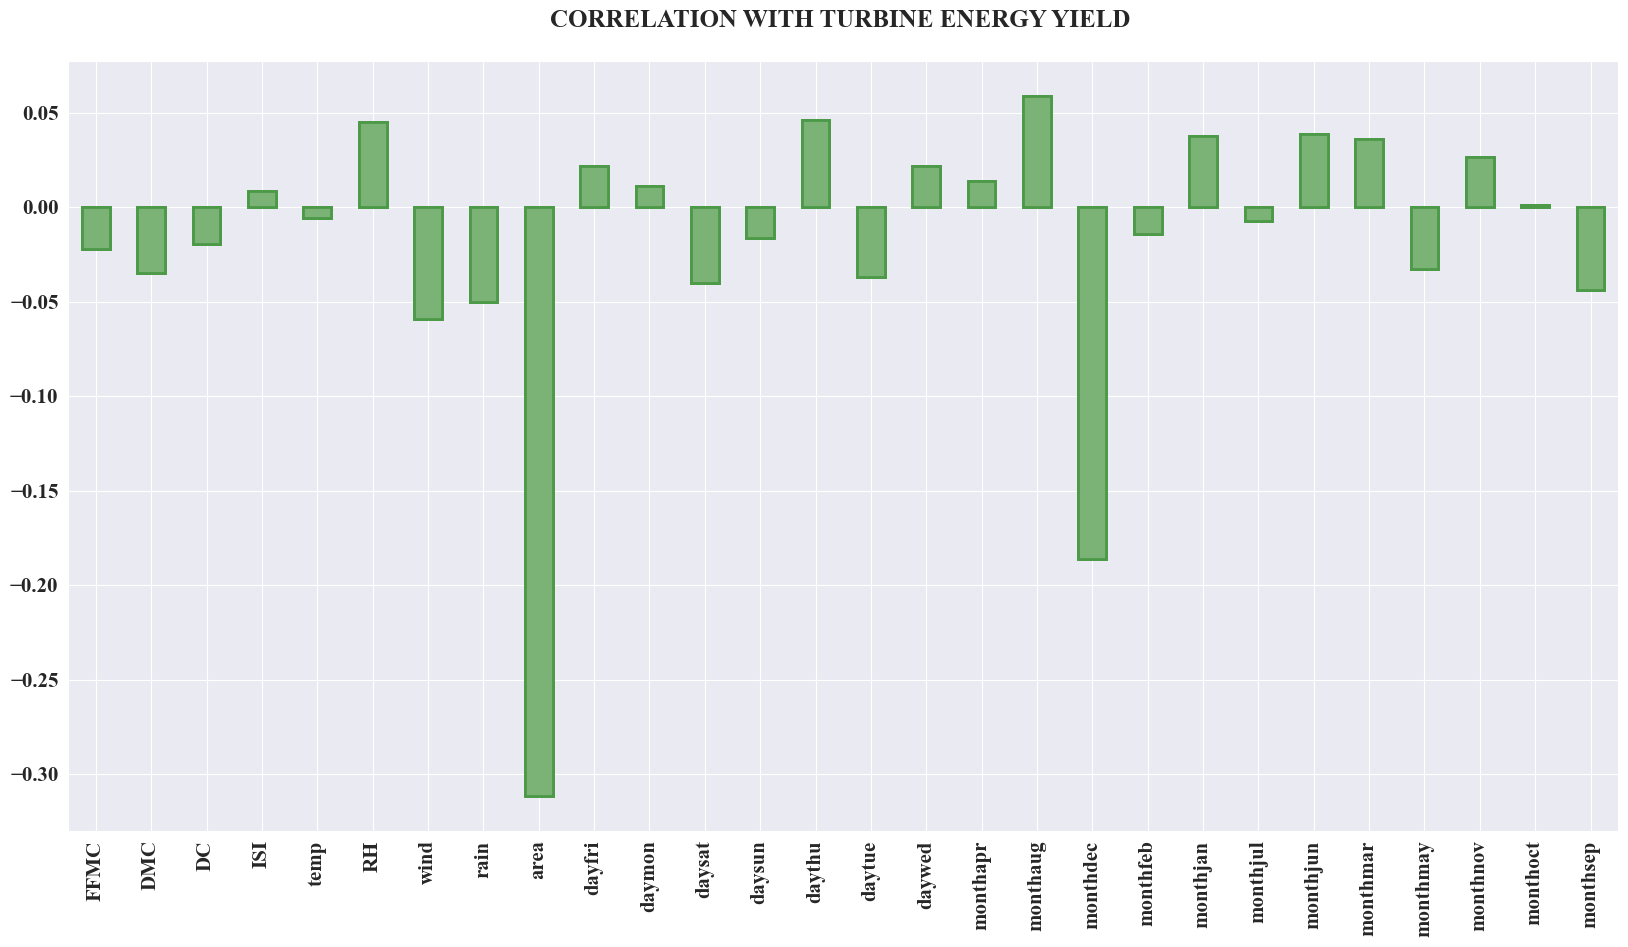

In [32]:
df=ff_data_corr.copy()
correlations = ff_data.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", weight='bold', size=15, rotation=90)
plt.yticks(fontfamily = "Times New Roman", weight='bold', size=15)
plt.show()

In [156]:
ff_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [157]:
fire_data = ff_data.drop(['month','day','area'], axis=1)

# Note: The column 'area' has the highest correlation of 15K and others are negligable so we will remove area for the time being from the original data to find the other significant columns.


In [158]:
fire_data.shape

(517, 28)

### **FEATURE SELECTION TECHNIQUE** ###

In [159]:
# Defining x and y attributes
x = fire_data.drop('size_category', axis=1)
y = fire_data[['size_category']]

In [37]:
# Feature extraction
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2, k=4)
fit_ff_feat = test.fit(x, y)

In [38]:
# Summarize scores
scores = fit_ff_feat.scores_
features = fit_ff_feat.transform(x)

In [39]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df['Feature'] = score_df['Feature']
score_df

# Note: The column 'area' has the highest correlation of 15K and others are negligable so we have remove area initially to find the other significant columns.

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


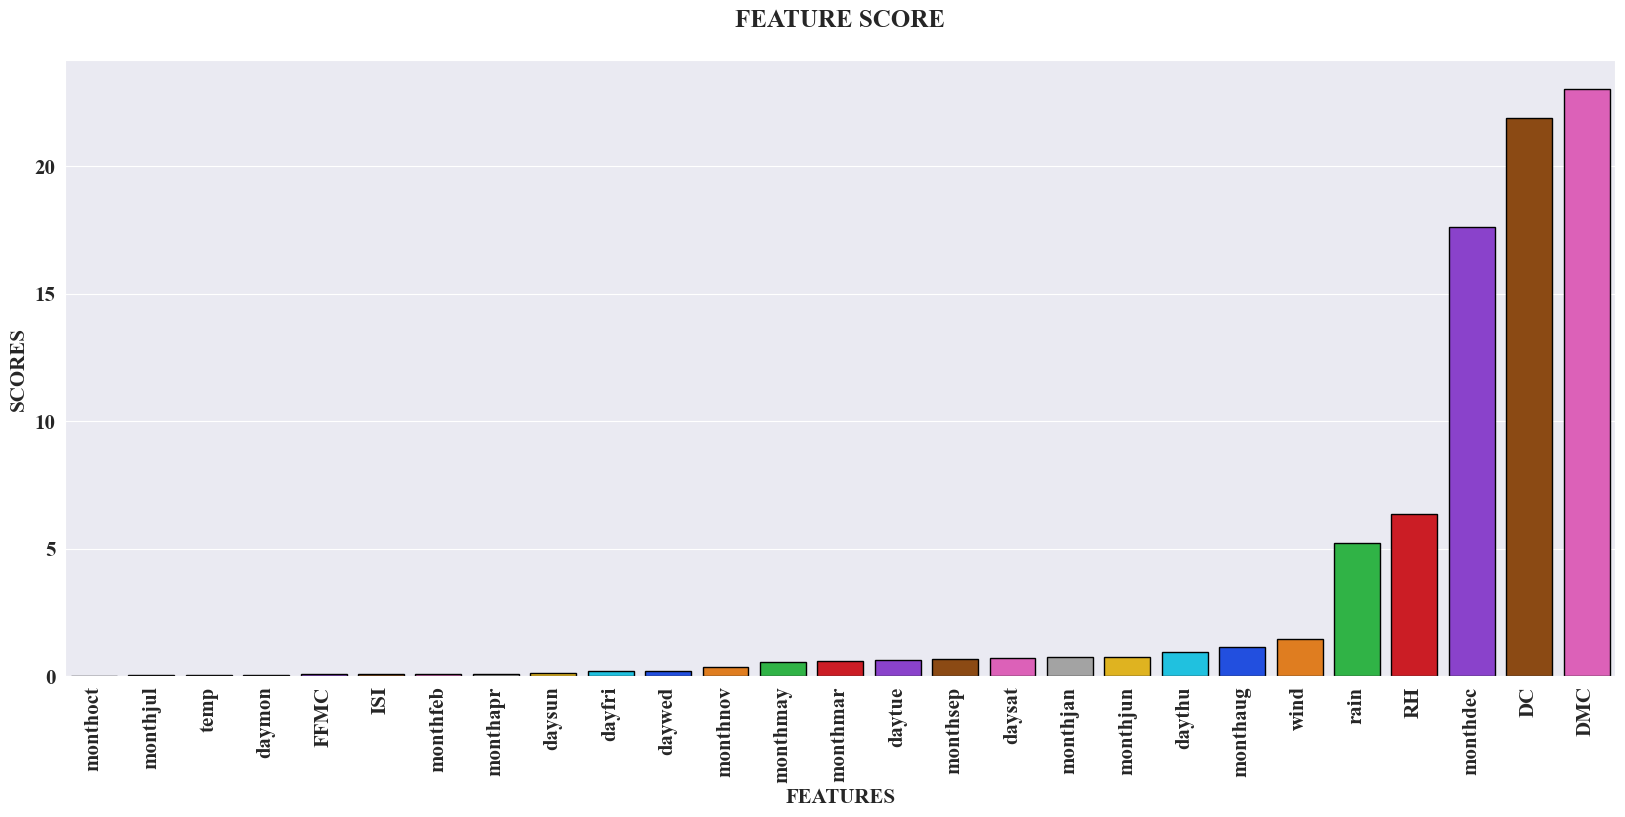

In [40]:
# Creating a chart with the Feature Score

plt.figure(figsize=(20,8))
# make barplot and sort bars
palette_color = sns.color_palette('bright')
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature, palette=palette_color, edgecolor="#000000", linewidth=1,)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.xticks(fontfamily = "Times New Roman", weight='bold', size=15, rotation=90)
plt.yticks(fontfamily = "Times New Roman", weight='bold', size=15)
plt.title('FEATURE SCORE\n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xlabel('FEATURES', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.ylabel('SCORES', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.show()

In [41]:
ff_data.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1


In [42]:
ff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [43]:
model_data_r = ff_data[['DMC','DC','RH','wind','rain','area','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep','size_category']]

# Taking all the top features and months features. Ignoring the days features and the other individual features having lesser scores

In [44]:
# Revised Model Data
model_data_r

,DMC,DC,RH,wind,rain,area,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,26.2,94.3,51,6.7,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1
1,35.4,669.1,33,0.9,0.0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,1
2,43.7,686.9,33,1.3,0.0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,1
3,33.3,77.5,97,4.0,0.2,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1
4,51.3,102.2,99,1.8,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,56.7,665.6,32,2.7,0.0,6.44,0,1,0,0,0,0,0,0,0,0,0,0,0
513,56.7,665.6,71,5.8,0.0,54.29,0,1,0,0,0,0,0,0,0,0,0,0,0
514,56.7,665.6,70,6.7,0.0,11.16,0,1,0,0,0,0,0,0,0,0,0,0,0
515,146.0,614.7,42,4.0,0.0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1


In [45]:
ff_ss = model_data_r.copy()

In [46]:
ff_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DMC            517 non-null    float64
 1   DC             517 non-null    float64
 2   RH             517 non-null    int64  
 3   wind           517 non-null    float64
 4   rain           517 non-null    float64
 5   area           517 non-null    float64
 6   monthapr       517 non-null    int64  
 7   monthaug       517 non-null    int64  
 8   monthdec       517 non-null    int64  
 9   monthfeb       517 non-null    int64  
 10  monthjan       517 non-null    int64  
 11  monthjul       517 non-null    int64  
 12  monthjun       517 non-null    int64  
 13  monthmar       517 non-null    int64  
 14  monthmay       517 non-null    int64  
 15  monthnov       517 non-null    int64  
 16  monthoct       517 non-null    int64  
 17  monthsep       517 non-null    int64  
 18  size_categ

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_columns = ff_ss.drop(['size_category'], axis=1).columns.tolist()
ff_ss[x_columns] = scaler.fit_transform(ff_ss[x_columns])
ff_ss

,DMC,DC,RH,wind,rain,area,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-1.323326,-1.830477,0.411724,1.498614,-0.073268,-0.202020,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,1
1,-1.179541,0.488891,-0.692456,-1.741756,-0.073268,-0.202020,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,1
2,-1.049822,0.560715,-0.692456,-1.518282,-0.073268,-0.202020,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,1
3,-1.212361,-1.898266,3.233519,-0.009834,0.603155,-0.202020,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,1
4,-0.931043,-1.798600,3.356206,-1.238940,-0.073268,-0.202020,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.736124,-0.073268,-0.100753,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,0
513,-0.846648,0.474768,1.638592,0.995798,-0.073268,0.651674,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,0
514,-0.846648,0.474768,1.577248,1.498614,-0.073268,-0.026532,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,0
515,0.549003,0.269382,-0.140366,-0.009834,-0.073268,-0.202020,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081,1


In [48]:
# Data taken for consideration is only the top 7 columns excluding 'NOX', 'AP' and 'AH'
input_data = ff_ss.drop(['size_category'], axis=1)
input_data.head()

,DMC,DC,RH,wind,rain,area,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.323326,-1.830477,0.411724,1.498614,-0.073268,-0.20202,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-1.179541,0.488891,-0.692456,-1.741756,-0.073268,-0.20202,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-1.049822,0.560715,-0.692456,-1.518282,-0.073268,-0.20202,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,-1.212361,-1.898266,3.233519,-0.009834,0.603155,-0.20202,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.931043,-1.798600,3.356206,-1.238940,-0.073268,-0.20202,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [49]:
# Target data
target_data = ff_ss[['size_category']]
target_data

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


### **CATEGORIZING TRAINING AND TESTING SETS** ###

In [50]:
# Splitting input_data and target_data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.3, random_state=3)

### **HYPERPARAMETER TUNING** ###

#### ***Optimal Learning rate ,Number of Layers and Neurons*** ####

In [51]:
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [52]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire')

Reloading Tuner from project\Forest Fire\tuner0.json


In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [54]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

In [55]:
tuner.results_summary()

Results summary
Results in project\Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 3
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 96
units_3: 64
units_4: 32
units_5: 32
units_6: 96
units_7: 64
units_8: 64
units_9: 64
units_10: 96
units_11: 64
units_12: 64
Score: 0.9893162250518799

Trial 4 summary
Hyperparameters:
num_layers: 14
units_0: 32
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 96
units_4: 96
units_5: 96
units_6: 64
units_7: 64
units_8: 64
units_9: 32
units_10: 32
units_11: 32
units_12: 96
units_13: 32
units_14: 32
units_15: 64
units_16: 64
units_17: 64
Score: 0.9850427110989889

Trial 2 summary
Hyperparameters:
num_layers: 18
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 32
units_3: 96
units_4: 32
units_5: 32
units_6: 64
units_7: 64
units_8: 96
units_9: 64
units_10: 64
units_11: 64
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 0.98290598

#### ***Optimal Batch Size, Number of Epochs*** ####

In [80]:
# create model: Function Definition
def create_model():
    model1 = Sequential()
    #below is the first layer
    model1.add(Dense(64, input_dim=18, kernel_initializer='uniform', activation='relu'))
    #Dense is a NN, 12 - no. of neurons, i/p - 18 columns, kernel_initializer=uniform - bias or weights can be taken from uniform distribution.
    #below is the second hidden layer
    model1.add(Dense(32,kernel_initializer='uniform', activation='relu'))
    #below is the output layer
    model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01) # Adam is the optimizer from stochastic Gradient descent variant, lr - learning rate - eta
    model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # using binary cross entropy find accuracy of model
    return model1

In [81]:
from scikeras.wrappers import KerasRegressor

# Create the model
model1 = KerasClassifier(build_fn=create_model,verbose=0)

# Define the grid search parameters: Batch Size and epochs
# model will be built using 10 batch size once, then 20, then 40
batch_size=[10,20,40,50]
epochs=[10,50,100,200] # makes all combinations all batch size and epochs

# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10) # by default it takes 5 K folds, verbose =10: displays 10 lines of epochs 1/12 for 10 times

# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [82]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.875 total time=   1.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.871 total time=   1.2s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.871 total time=   1.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.871 total time=   1.2s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.839 total time=   1.2s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

In [83]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.922983870967742, using {'batch_size': 10, 'epochs': 100}
0.8653225806451614,0.0133977804240614 with {'batch_size': 10, 'epochs': 10}
0.9163306451612904,0.048496180803743995 with {'batch_size': 10, 'epochs': 50}
0.922983870967742,0.033064516129032266 with {'batch_size': 10, 'epochs': 100}
0.922983870967742,0.033064516129032266 with {'batch_size': 10, 'epochs': 200}
0.8391129032258066,0.06184490183883176 with {'batch_size': 20, 'epochs': 10}
0.922983870967742,0.033064516129032266 with {'batch_size': 20, 'epochs': 50}
0.9163306451612904,0.05261285625282212 with {'batch_size': 20, 'epochs': 100}
0.9227822580645162,0.03894626958608767 with {'batch_size': 20, 'epochs': 200}
0.78125,0.06692212264624985 with {'batch_size': 40, 'epochs': 10}
0.8840725806451614,0.048630102165515866 with {'batch_size': 40, 'epochs': 50}
0.9165322580645162,0.033143100948442784 with {'batch_size': 40, 'epochs': 100}
0.9098790322580645,0.05184078974890142 with {'batch_size': 40, 'epochs': 200}
0.775,0.0554285

#### ***Optimal Learning and Dropout Rate*** ####

In [112]:
from keras.layers import Dropout
# drop out rate - to control the accuracy. To overcome overfit of model randomly remove connection of some neurons
# Defining the model

def create_model(learning_rate,dropout_rate):
    model2 = Sequential()
    model2.add(Dense(8,input_dim = 18,kernel_initializer = 'normal',activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(12,input_dim = 18,kernel_initializer = 'normal',activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(32,input_dim = 18,kernel_initializer = 'normal',activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(64,input_dim = 18,kernel_initializer = 'normal',activation = 'relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model2.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model2

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50,dropout_rate = [0.0,0.1,0.2],learning_rate = [0.001,0.01,0.1])

# Define the grid search parameters: Learning rate and dropout rate are the hyperparameters we want to test
learning_rate = [0.001,0.01,0.1] # Need to add this in the KerasClassifier function as well as it is giving an error if not given
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5]# drop 0%,10%, 20% neurons

# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model2,cv = KFold(),param_grid = param_grids,verbose = 10) # total (3*3)*5 default folds=45 models will be built. (Lrate 3 values, Dropout rate =3, 3*3=9,)

In [113]:
grid_result2 = grid.fit(x_test,y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.875 total time=   2.2s
[CV 2/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.839 total time=   2.2s
[CV 3/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 3/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.742 total time=   2.4s
[CV 4/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 4/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.774 total time=   2.3s
[CV 5/5; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 5/5; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.774 total time=   2.2s
[CV 1/5; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV

In [114]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9165322580645162, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8008064516129034,0.048628430424778504 with {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.890725806451613,0.05276560581598577 with {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7495967741935483,0.06689660744319516 with {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8199596774193549,0.049333816416811505 with {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8717741935483871,0.020465447645886304 with {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8006048387096774,0.05662559594869856 with {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7877016129032258,0.061004479885308445 with {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9165322580645162,0.03891912423230211 with {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7622983870967741,0.057650010175688826 with {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.76875,0.03952641406640642 with {'dropout_rate': 0.3, 'learning_rate': 0.001}
0.9102822580645162,0.031505846541318654 

#### ***Optimal Activation function and Kernel Initializer*** ####

In [96]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [97]:
model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0,activation_function=['softmax','tanh','relu'],init=['normal','uniform','zero'])
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [98]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.938 total time=   5.2s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   4.5s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.903 total time=   4.2s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.839 total time=   4.6s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.871 total time=   4.5s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [99]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9231854838709678, using {'activation_function': 'relu', 'init': 'uniform'}
0.9036290322580646,0.045911113959646074 with {'activation_function': 'softmax', 'init': 'normal'}
0.9163306451612904,0.0439959823395129 with {'activation_function': 'softmax', 'init': 'uniform'}
0.8973790322580646,0.013257485663527085 with {'activation_function': 'softmax', 'init': 'zero'}
0.8905241935483872,0.05271165402777065 with {'activation_function': 'tanh', 'init': 'normal'}
0.9036290322580646,0.041129032258064524 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9165322580645162,0.04394236363169444 with {'activation_function': 'tanh', 'init': 'zero'}
0.890725806451613,0.05657245131385675 with {'activation_function': 'relu', 'init': 'normal'}
0.9231854838709678,0.038425113324843385 with {'activation_function': 'relu', 'init': 'uniform'}
0.8971774193548387,0.04774438746972801 with {'activation_function': 'relu', 'init': 'zero'}


#### **BUILDING NEURAL NETWORKS MODEL USING OPTIMAL VALUES** ####

#### ***Initialising the ANN*** ####

In [115]:
def toFindBestParams(x_train, y_train, x_test, y_test):
   
    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8421052694320679
batch_size: 5 - epochs: 10 Accuracy: 0.9113573431968689
batch_size: 5 - epochs: 50 Accuracy: 0.9806094169616699
batch_size: 5 - epochs: 100 Accuracy: 0.9889196753501892
batch_size: 10 - epochs: 5 Accuracy: 0.7811634540557861
batch_size: 10 - epochs: 10 Accuracy: 0.8642659187316895
batch_size: 10 - epochs: 50 Accuracy: 0.9695290923118591
batch_size: 10 - epochs: 100 Accuracy: 0.9861496090888977
batch_size: 15 - epochs: 5 Accuracy: 0.7783933281898499
batch_size: 15 - epochs: 10 Accuracy: 0.8310249447822571
batch_size: 15 - epochs: 50 Accuracy: 0.9833794832229614
batch_size: 15 - epochs: 100 Accuracy: 0.9833794832229614
batch_size: 20 - epochs: 5 Accuracy: 0.761772871017456
batch_size: 20 - epochs: 10 Accuracy: 0.7894737124443054
batch_size: 20 - epochs: 50 Accuracy: 0.9750692248344421
batch_size: 20 - epochs: 100 Accuracy: 0.9861496090888977


#### ***Training Model - using best params*** ####

In [116]:
# Creating the ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 29ms/step - loss: 0.6888 - accuracy: 0.6805 - val_loss: 0.6840 - val_accuracy: 0.7083
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.7635 - val_loss: 0.6715 - val_accuracy: 0.7083
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.7759 - val_loss: 0.6467 - val_accuracy: 0.7000
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6057 - accuracy: 0.7718 - val_loss: 0.6094 - val_accuracy: 0.7167
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.7759 - val_loss: 0.5778 - val_accuracy: 0.7250
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5203 - accuracy: 0.7842 - val_loss: 0.5635 - val_accuracy: 0.7417
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4959 - accuracy: 0.7801 - val_loss: 0.5562 - val_accuracy: 0.7500
Epoch 8/100


#### ***Model Evaluation Train and Test Error*** ####

In [173]:
# Evaluation of the model
train_score = model.evaluate(x_train, y_train, verbose = 1)
print(f'Train Score: {train_score[1]*100}')
test_score = model.evaluate(x_test, y_test, verbose = 1)
print(f'Test Score: {test_score[1]*100}')

12/12 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9723
Train Score: 97.22991585731506
5/5 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.9423
Test Score: 94.2307710647583


In [165]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### ***Compare the train-set and test-set accuracy*** ####

*Check for overfitting and underfitting*

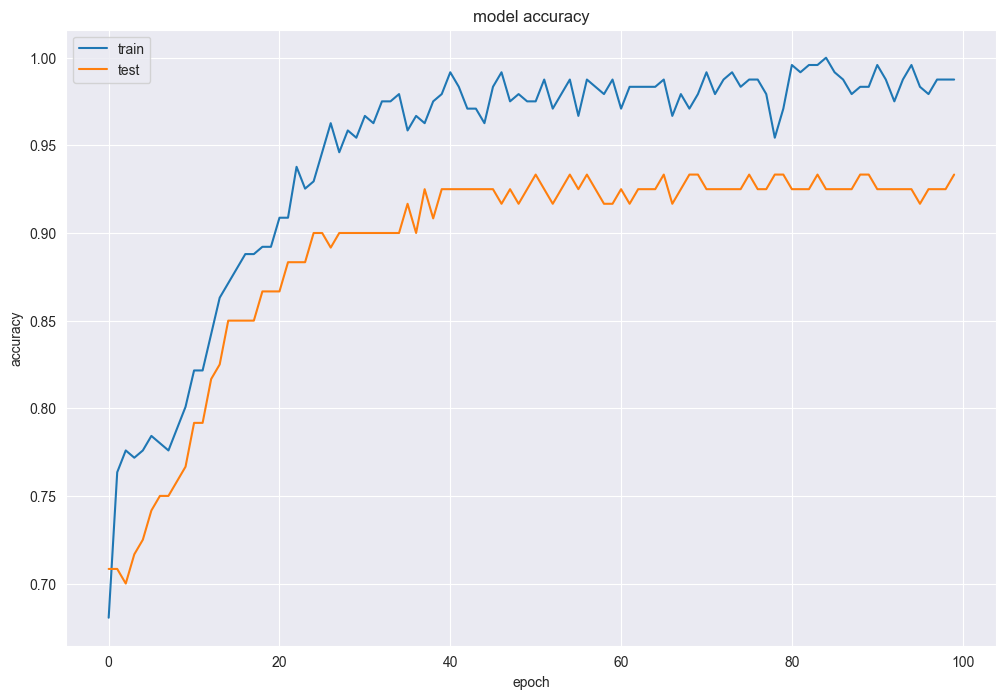

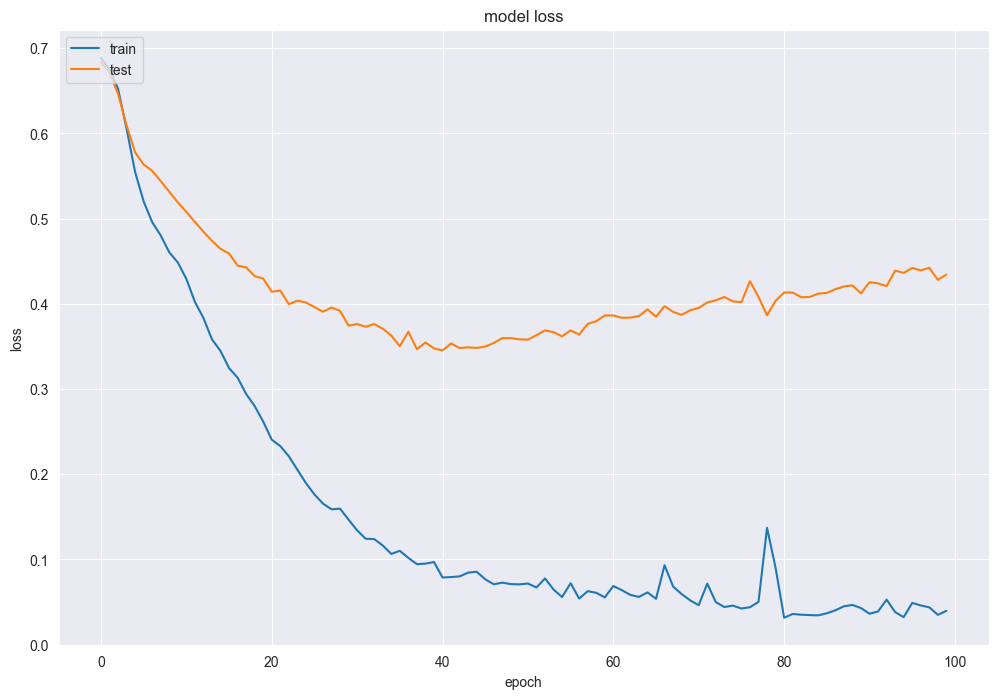

In [119]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### ***Predicting values from Model using same dataset*** ####

In [148]:

# Generating predictions for test data
y_pred_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_pred_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 3ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
16,1,0.998259,1
218,0,0.002284,0
418,1,0.996087,1
102,1,0.998115,1
441,1,0.997636,1
164,1,0.996300,1
415,0,0.002284,0
204,0,0.002491,0
356,1,0.997545,1
298,1,0.998566,1


In [149]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 3ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
123,1,0.998193,1
237,0,0.002284,0
364,1,0.676237,1
287,1,0.997446,1
378,1,0.998273,1
98,1,0.998110,1
328,1,0.998131,1
434,1,0.998066,1
177,1,0.920735,1
425,1,0.998082,1


#### ***Classification Report*** ####

In [174]:
# Classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100
confusion_matrix_train = confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted'])
classification = classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted'])
print(f'Accuracy score for the training data\t: {accuracy}%\n')
print(f'Confusion Matrix for the training data\t:\n{confusion_matrix_train}\n')
print(f'Classification Report for Train Data\t:\n{classification}')

Accuracy score for the training data	: 97.0%

Confusion Matrix for the training data	:
[[ 91   8]
 [  2 260]]

Classification Report for Train Data	:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        99
           1       0.97      0.99      0.98       262

    accuracy                           0.97       361
   macro avg       0.97      0.96      0.96       361
weighted avg       0.97      0.97      0.97       361



In [175]:
# Classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_test = np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100
confusion_matrix_test = confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted'])
classification_test = classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted'])
print(f'Accuracy score for the test data\t: {accuracy_test}%\n')
print(f'Confusion Matrix for the test data\t:\n{confusion_matrix_test}\n')
print(f'Classification Report for test Data\t:\n{classification_test}')

Accuracy score for the test data	: 94.0%

Confusion Matrix for the test data	:
[[ 32   8]
 [  1 115]]

Classification Report for test Data	:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.93      0.99      0.96       116

    accuracy                           0.94       156
   macro avg       0.95      0.90      0.92       156
weighted avg       0.94      0.94      0.94       156



In [152]:
# Training and testing scores
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
train_score = accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100
test_score = accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100
print(f'Training Score: {train_score}%')
print(f'Testing Score: {test_score}%')

12/12 [==============================] - 0s 2ms/step
Training Score: 97.22991689750693%
Testing Score: 94.23076923076923%


#### ***Confusion matrix*** ####

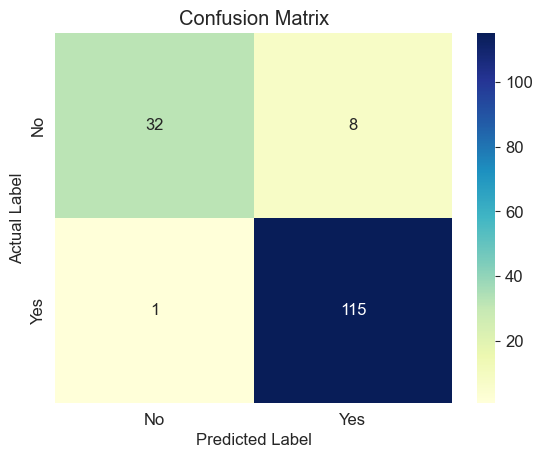

In [153]:
# Plotting the confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#### ***ROC - AUC Curve*** ####

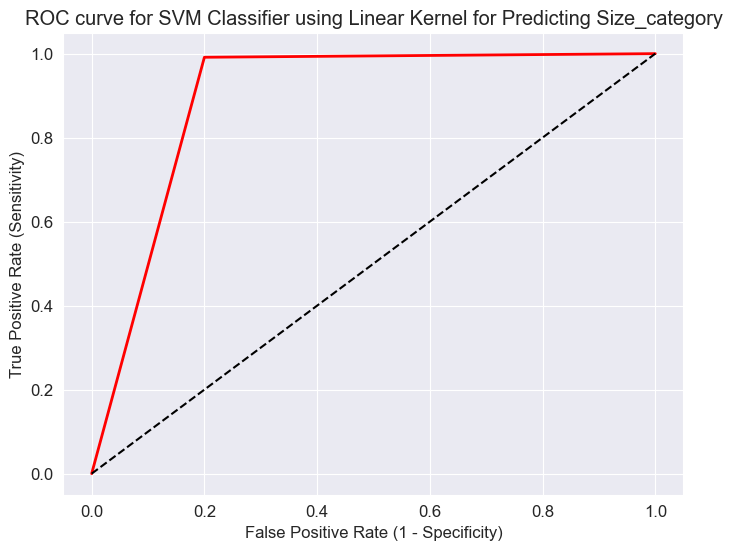

ROC AUC : 0.8957


In [154]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
print('ROC AUC : {:.4f}'.format(ROC_AUC))

Text(0, 0.5, 'Frequency')

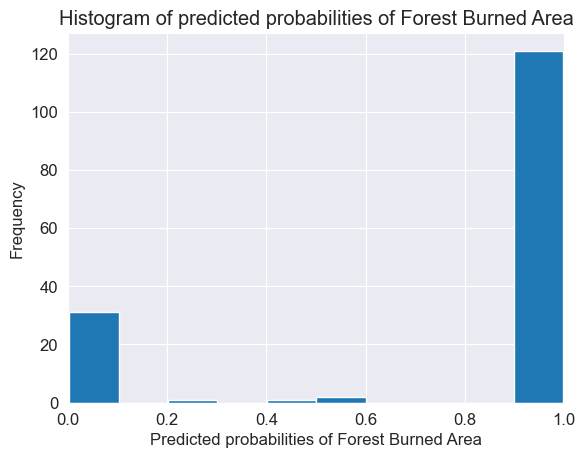

In [131]:
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(test_prediction['Test_Probability'], bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Forest Burned Area')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Forest Burned Area')
plt.ylabel('Frequency')